In [3]:
# Let's import the necessasy libraries to carry out our analysis.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
#Lets import the Brooklyn dataset

df = pd.read_csv('brooklyn_sales_map.csv')

# Setting display options to view all columns

pd.set_option('display.max_columns',111)
pd.set_option('display.max_rows',500)

In [6]:
df.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,sale_date,year_of_sale,Borough,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,11201,0,1,1,0.0,0.0,2002,4,R5,499401179.0,2008-04-23,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,11201,0,0,0,134988.0,0.0,0,4,G7,345000000.0,2016-12-20,2016,BK,302.0,21.00,3017.0,13.0,33.0,11201.0,L118,84.0,36.0,1000.0,3.0,2.0,1B,87 JAY STREET,M1-2/R8,NaN,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,N,G7,10.0,0.0,P,85 JAY STREET BROOKLY,134988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,490.50,275.33,0.0,0.00,NaN,0.0,N,5.0,5.0,1571850.0,1571850.0,1571850.0,1571850.0,0.0,0.0,0.0,NaN,NaN,0.00,7.20,2.0,6.5,3.0,3.000540e+09,0.0,21.0,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,11201,0,0,0,32000.0,304650.0,1924,4,O6,340000000.0,2016-08-03,2016,BK,302.0,1.00,1003.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,29 COLUMBIA HEIGHTS,M2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,O6,5.0,0.0,NaN,25-30 COLUMBIA HEIGHT,32000.0,304650.0,304650.0,0.0,264750.0,0.0,0.0,0.0,0.0,39900.0,2.0,1.0,13.0,0.0,0.0,92.42,335.92,335.0,92.00,NaN,0.0,Y,3.0,5.0,1548000.0,25463250.0,0.0,0.0,1924.0,1980.0,0.0,NaN,NaN,9.52,0.00,2.0,0.0,3.0,3.002040e+09,0.0,1.0,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,11234,0,123,123,905000.0,2548000.0,1970,4,K6,276947000.0,2012-11-28,2012,BK,318.0,698.00,2005.0,22.0,46.0,11234.0,E323,63.0,35.0,8822.0,3.0,18.0,4E,5120 AVENUE U,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K6,5.0,1.0,NaN,BROOKLYN KINGS PLAZA,905000.0,2548000.0,2548000.0,0.0,0.0,1263000.0,1285000.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,123.0,930.00,859.00,0.0,0.00,NaN,0.0,Y,3.0,5.0,36532350.0,149792400.0,0.0,0.0,1970.0,0.0,0.0,NaN,NaN,2.82,0.00,2.0,0.0,3.0,3.084700e+09,0.0,698.0,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,11201,0,1,1,20267.0,356000.0,1927,4,H8,202500000.0,2017-10-31,2017,BK,302.0,3.01,2000.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,79 WILLOW STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LH-1,N,H8,8.0,0.0,X,WATCHTOWER C/O REAL P,20267.0,356000.0,30000.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,0.0,1.0,202.00,100.33,202.0,100.33,NaN,0.0,N,3.0,2.0,2250000.0,27166050.0,225

In [4]:
print(f'Total number of rows = {df.shape[0]}')
print(f'Total number of columns = {df.shape[1]}')

Total number of rows = 390883
Total number of columns = 111


In [5]:
df.dtypes

Unnamed: 0                   int64
borough                      int64
neighborhood                object
building_class_category     object
tax_class                   object
block                        int64
lot                          int64
easement                   float64
building_class              object
address                     object
apartment_number            object
zip_code                     int64
residential_units            int64
commercial_units             int64
total_units                  int64
land_sqft                  float64
gross_sqft                 float64
year_built                   int64
tax_class_at_sale            int64
building_class_at_sale      object
sale_price                 float64
sale_date                   object
year_of_sale                 int64
Borough                     object
CD                         float64
CT2010                     float64
CB2010                     float64
SchoolDist                 float64
Council             

# Too many features...

''' It can be clearly seen from the above table that there are lots of features in our dataset. Before we begin our analysis,
we should drop all unnecessary features with proper reasoning. '''

''' After dropping unnecessary features we will proceed to correcting the data types of each feature, five point summary, exploring the distribution of numerical features, frequency of sub-categories in categorical features etc.''' 

In [6]:
# Exploring the null values in our dataset

null_count = df.isnull().sum().reset_index().rename(columns={'index':'columns',0:'Null count'})
null_percentage = (df.isnull().mean()*100).reset_index().rename(columns={'index':'columns',0:'Percentage of Null values'})
df_null = pd.concat([null_count,null_percentage.iloc[:,1]],axis = 1)
df_null

,columns,Null count,Percentage of Null values
0,Unnamed: 0,0,0.000000
1,borough,0,0.000000
2,neighborhood,0,0.000000
3,building_class_category,83,0.021234
4,tax_class,6934,1.773932
5,block,0,0.000000
6,lot,0,0.000000
7,easement,390883,100.000000
8,building_class,6934,1.773932
9,address,1,0.000256


In [7]:
# Finding columns that have more than 70% null values.

print(df_null[df_null['Percentage of Null values'] > 70])

print('\n',f"Number of columns that have more than 70% null values = {df_null[df_null['Percentage of Null values'] > 70].shape[0]}")

to_drop_columns_1 = df_null[df_null['Percentage of Null values'] > 70]['columns'].values

print('\n',f"List of columns = {to_drop_columns_1}")

              columns  Null count  Percentage of Null values
7            easement      390883                 100.000000
10   apartment_number      305267                  78.096771
39          ZoneDist2      375768                  96.133114
40          ZoneDist3      390697                  99.952415
41          ZoneDist4      390880                  99.999233
42           Overlay1      348962                  89.275307
43           Overlay2      390835                  99.987720
44            SPDist1      355383                  90.917998
45            SPDist2      390859                  99.993860
46            SPDist3      390879                  99.998977
47          LtdHeight      385762                  98.689889
52          OwnerType      337389                  86.314575
73                Ext      324750                  83.081127
85           HistDist      371209                  94.966780
86           Landmark      390757                  99.967765
98             ZMCode   

# Some important feature definitions :-

In [8]:
# Borough
''' New York City is divided into five boroughs: Brooklyn, Manhattan, Queens, the Bronx, and Staten Island.
    Borough number '3' refers to Brooklyn'''

#PLUTO
'''PLUTO: Extensive land use and geographic data at the tax lot level in comma–separated values (CSV) file format. 
The PLUTO files contain more than seventy fields derived from data maintained by city agencies.'''

# 'MAPPLUTO_F' ,'PLUTOMapID'
'''A code indicating whether the tax lot is in the PLUTO file, the MapPLUTO file with 
water areas included, and/or the MapPLUTO file that is clipped to the shoreline.'''

# 'APPBBL' ( APPORTIONMENT BOROUGH, BLOCK and LOT )
'''The originating BBL (borough, block and lot) from the apportionment prior to the merge, split or property’s 
conversion to a condominium.'''

# 'TaxMap'
'''A tax map is a special purpose map, accurately drawn to scale showing all the real property parcels within a city, 
town or village. These maps are used to locate parcels and obtain other information required in assessment work. 
As changes take place in ownership, size, or shape of the parcels, the tax map system must be updated.'''

# 'Sanborn'
'''The Sanborn Map number associated with the tax block and lot.'''

# 'Tract2010'
'''The 2010 census tract in which the tax lot is located.'''
''' property tax related column'''

# BBL
'''A concatenation of the borough code, tax block and tax lot.'''

# 'BoroCode' 
'''contains borough code'''

# 'CT2010'
'''The 2010 census tract in which the tax lot is located.'''

# 'CB2010'
'''The 2010 census block in which the tax lot is located.'''

# 'CD'
'''The community district (CD) or joint interest area (JIA) for the tax lot. The city is divided into 59 community 
districts and 12 joint interest areas, which are large parks or airports that are not considered part of any 
community district.'''

# 'FireComp'
'''The fire company that services the tax lot.'''

# 'HealthArea'
'''The health area in which the tax lot is located.'''

# 'HealthCent'
'''The health center district in which the tax lot is located. Thirty health center districts were created by the City
in 1930 to conduct neighborhood focused health interventions.'''

# 'ProxCode'
'''If there are multiple buildings on the lot, CAMA data for building number 1 is used.

Value Description

0 Not available

1 Detached

2 Semi-attached

3 Attached'''

# 'IrrLotCode'

'''A code indicating whether the tax lot is irregularly shaped or not'''

# 'LotType'

'''Value Description

1 Block assemblage – a tax lot that encompasses an entire block

2 Waterfront – a tax lot bordering on a body of water. Waterfront lots may contain a small amount of submerged land.

3 Corner – a tax lot bordering on two intersecting streets

4 Through – a tax lot connecting two streets, with frontage on both streets. Note that a lot with two frontages is not 
            necessarily a through lot. For example, an L-shaped lot with two frontages is considered an inside lot (5).

5 Inside – a tax lot with frontage on only one street. This value comes from CAMA, but is only assigned in PLUTO if 
            CAMA has no other lot types for the tax lot.

6 Interior lot – a tax lot that has no street frontage

7 Island lot – a tax lot that is entirely surrounded by water 

8 Alley lot – a tax lot that is too narrow to accommodate a building. The lot is usually 12 feet or less in width.

9 Submerged land lot – a tax lot that is totally or almost completely submerged'''

# 'YCoord'
'''The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot.'''

# 'XCoord'
'''The X coordinate of the XY coordinate pair which depicts the approximate location of the lot.'''

# 'AssessLand'
'''The assessed land value for the tax lot.
The Department of Finance calculates the assessed value by multiplying the tax lot’s 
estimated full market land value, determined as if vacant and unimproved, by a 
uniform percentage for the property’s tax class'''

# 'AssessTot'
'''The Department of Finance calculates the assessed value by multiplying the tax lot’s 
estimated full market value by a uniform percentage for the property’s tax class.'''

# 'YearAlter1','YearAlter2'
'''If a building has only been altered once, YEAR ALTERED 1 is the date that 
alteration began.
If a building has been altered more than once, YEAR ALTERED 1 is the year of the 
second most recent alteration.
The Department of Finance defines alterations as modifications to the structure that, 
according to the assessor, change the value of the real property.
The date comes from Department of Buildings permits and may either be the actual 
date or an estimate'''

# 'ExemptTot'
'''The exempt total value, which is determined differently for each exemption program, 
is the dollar amount related to that portion of the tax lot that has received an 
exemption.'''

# 'OwnerName'
'''Contains owner's name'''

# 'PolicePrct'
'''The police precinct in which the tax lot is located. This field contains a three-digit police precinct number which is 
preceded with leading zeros if the precinct number has less than three digits.'''

# 'building_class'
'''Building class during construction'''

# 'SanitDistr'
'''The sanitation district that services the tax lot.'''

# 'SanitSub'
'''The subsection of the sanitation district that services the tax lot'''

# 'LandUse'
'''A code for the tax lot's land use category.'''
'''VALUE DESCRIPTION
01 One & Two Family Buildings
02 Multi-Family Walk-Up Buildings
03 Multi-Family Elevator Buildings
04 Mixed Residential & Commercial Buildings
05 Commercial & Office Buildings
06 Industrial & Manufacturing
07 Transportation & Utility
08 Public Facilities & Institutions
09 Open Space & Outdoor Recreation
10 Parking Facilities
11 Vacant Land'''

# 'sale_date'
'''Actual date on which sale took happened'''

# 'ExemptTot' , 'ExemptLand'
'''The exempt total value, which is determined differently for each exemption program, 
is the dollar amount related to that portion of the tax lot that has received an 
exemption.'''

# 'Easements'
'''An easement is a nonpossessory right to use and/or enter onto the real property of another without possessing it.'''

'An easement is a nonpossessory right to use and/or enter onto the real property of another without possessing it.'

In [9]:
# Let's assign a list to add columns that needs to be dropped

to_drop_columns = []


# All records belong to Brooklyn, so both 'Borough' and 'Borough' columns can be dropped.

print(df['Borough'].value_counts())

print('\n',df['borough'].value_counts())

to_drop_columns.extend(['borough','Borough'])

# 'Unnamed: 0' is a unique row identifier. It can be dropped.

to_drop_columns.extend(['Unnamed: 0'])

# 'Version' refers to the PLUTOmap version. It can be dropped.

to_drop_columns.extend(['Version'])

# 'PLUTOMapID' refers to the map ID. It can be dropped.

to_drop_columns.extend(['PLUTOMapID'])

# 'MAPPLUTO_F' refers to the PLUTO file. It can be dropped.

to_drop_columns.extend(['MAPPLUTO_F'])

# 'APPBBL' is an insignificant feature. It can be dropped.

to_drop_columns.extend(['APPBBL'])

# 'TaxMap' can be dropped - it is a categorical feature with 200 sub categories

to_drop_columns.extend(['TaxMap'])

# 'Sanborn' feature is insignificant, it can be dropped.

to_drop_columns.extend(['Sanborn'])

# 'Tract2010' feature is insignificant, it can be dropped.

to_drop_columns.extend(['Tract2010'])
                     
# 'BBL' feature is insignificant, it can be dropped.

to_drop_columns.extend(['BBL'])

# 'BoroCode' feature is insignificant, it can be dropped.

to_drop_columns.extend(['BoroCode'])

# 'CT2010' feature is insignificant, it can be dropped.

to_drop_columns.extend(['CT2010'])

# 'CB2010' feature is insignificant, it can be dropped.

to_drop_columns.extend(['CB2010'])

# 'FireComp' feature is insignificant, it can be dropped.

to_drop_columns.extend(['FireComp'])

# 'HealthArea' feature is insignificant, it can be dropped.

to_drop_columns.extend(['HealthArea'])

# 'HealthCent' feature is insignificant, it can be dropped.

to_drop_columns.extend(['HealthCent'])

# 'YCoord','XCoord' :we do not need specific plot locations. Both features can be dropped.

to_drop_columns.extend(['YCoord','XCoord'])

# 'OwnerName'. This column can be dropped as it does not hold any significance.

to_drop_columns.extend(['OwnerName'])

# 'PolicePrct' feature is insignificant, it can be dropped.(it has got nothing to do with property price)

to_drop_columns.extend(['PolicePrct'])

# 'building_class' it can be dropped because building class at sale is more important.

to_drop_columns.extend(['building_class'])

# 'SanitDistr' feature is insignificant, it can be dropped.

to_drop_columns.extend(['SanitDistr'])

# 'SanitSub' feature is insignificant, it can be dropped.

to_drop_columns.extend(['SanitSub'])

# 'ZoneDist1' : since other Zones are dropped due to high percentage of null values, this can also be dropped

to_drop_columns.extend(['ZoneDist1'])

# 'sale_date' feature is too specific.It can be dropped.

to_drop_columns.extend(['sale_date'])

# 'ExemptTot' , 'ExemptLand' . These two features do not influence the price of a building.
#  government decides the exemption and revises it twice a year

to_drop_columns.extend(['ExemptTot','ExemptLand'])

# 'Easements' . All the values are zero in this feature.It can be dropped.


BK    303728
Name: Borough, dtype: int64

 3    390883
Name: borough, dtype: int64


In [10]:
# Combining our null columns list with insignificant columns list

to_drop_columns.extend(to_drop_columns_1)

print(f'Number of columns to be dropped = {len(to_drop_columns)}')

Number of columns to be dropped = 48


In [11]:
# let's create a copy of our original dataframe

df_copy = df.copy()

#Now let's drop all the insignificant features.

df_copy.drop(columns=to_drop_columns,inplace=True)

In [12]:
print(f'Total number of rows after 1st mass drop = {df_copy.shape[0]}')
print(f'Total number of columns after 1st mass drop = {df_copy.shape[1]}')

Total number of rows after 1st mass drop = 390883
Total number of columns after 1st mass drop = 63


# Before proceeding any further let's make use of the information we have to clean the dataset.

'''Note that as in other uploaded datasets of NYC housing on Kaggle, many of these transactions have a sale_price of $0 or 
only a nominal amount far less than market value. These are likely property transfers to relatives and should be excluded 
from any analysis of market prices.'''


1. So we shall exclude all rows that have a sale price of 0 dollars or sale price less than 1000 dollars.

2. By doing so we will reduce the numbers of rows in the dataset, which is unavoidable.

In 2020, the government of New York City projected Brooklyn's population at 2,648,403.

In [13]:
df_copy2 = df_copy[df_copy['sale_price'] > 1000]

In [14]:
print(f'Total number of rows after excluding properties less than $1000 = {df_copy2.shape[0]}')
print(f'Total number of columns after excluding properties less than $1000 = {df_copy2.shape[1]}')

Total number of rows after excluding properties less than $1000 = 245384
Total number of columns after excluding properties less than $1000 = 63


In [15]:
# Let's check the building class categories in the dataset

df_copy2['building_class_category'].value_counts()

02 TWO FAMILY HOMES                            62426
01 ONE FAMILY HOMES                            33990
10  COOPS - ELEVATOR APARTMENTS                28934
13  CONDOS - ELEVATOR APARTMENTS               25307
03 THREE FAMILY HOMES                          21514
07  RENTALS - WALKUP APARTMENTS                15456
09  COOPS - WALKUP APARTMENTS                   7700
15  CONDOS - 2-10 UNIT RESIDENTIAL              7222
04  TAX CLASS 1 CONDOS                          6287
12  CONDOS - WALKUP APARTMENTS                  5117
05  TAX CLASS 1 VACANT LAND                     3432
14  RENTALS - 4-10 UNIT                         3403
22  STORE BUILDINGS                             2519
13 CONDOS - ELEVATOR APARTMENTS                 2501
29  COMMERCIAL GARAGES                          2352
28  COMMERCIAL CONDOS                           1947
10 COOPS - ELEVATOR APARTMENTS                  1908
31  COMMERCIAL VACANT LAND                      1653
27  FACTORIES                                 

# IMPORTANT DECISION

1. In Real Estate price prediction we cannot combine different categories(different assest classes) together and build 
'one size fits all' model.


2. So we have to cut down to three categories and seperate them afterwards and perform EDA for each of three categories.


3. Then we will build one model for each Property category.


4. This is possible because we have a good sample size for each category.


5. This is done to increase performance of our model.

OUR three categories are

'ONE FAMILY HOME'

'TWO FAMILY HOME'

'THREE FAMILY HOME'


In [16]:
# Selecting our three building class categories from the dataset

df_copy3 = df_copy2[(df_copy2['building_class_category'] == '01 ONE FAMILY HOMES') | 
                    (df_copy2['building_class_category'] == '02 TWO FAMILY HOMES') | 
                    (df_copy2['building_class_category'] == '03 THREE FAMILY HOMES')]

print(f'Total number of rows after category selection = {df_copy3.shape[0]}')
print(f'Total number of 3columns after category selection = {df_copy3.shape[1]}')


# Let's check the buidling categories in our dataset

print('\n',df_copy3['building_class_category'].value_counts())

Total number of rows after category selection = 117930
Total number of columns after category selection = 63

 02 TWO FAMILY HOMES      62426
01 ONE FAMILY HOMES      33990
03 THREE FAMILY HOMES    21514
Name: building_class_category, dtype: int64


## Let's check for features with duplicates, low variance, high data imbalance and drop them.


In [17]:
# 'Address','BldgClass','YearBuilt','ZipCode'  - duplicate columns

# Let's store the different categories in a list

building_categories = ['01 ONE FAMILY HOMES','02 TWO FAMILY HOMES','03 THREE FAMILY HOMES']


'''The below features were selected by going through all features and finding value counts to check distribution with respect 
to each building category'''

feature_list = ['CondoNo','SplitZone','residential_units','commercial_units','total_units','tax_class','SanitBoro',
                'BldgClass','tax_class_at_sale','AreaSource','OfficeArea','FactryArea','StrgeArea','GarageArea',
                'RetailArea','Easements']




for i in building_categories:
    print('\n',i)
    print('\n')
    for j in feature_list:
        print(j)
        index = df_copy3[df_copy3['building_class_category']==i][j].value_counts(normalize=True).index[0]
        value = (df_copy3[df_copy3['building_class_category']==i][j].value_counts(normalize=True)*100).values[0]
        print(f'''{index} : {round(value,2)}% ''')
    print('\n')


'''for each loop the data point with highest frequency in each feature with it's respective frequency is printed 
for each building category.'''


 01 ONE FAMILY HOMES


CondoNo
0.0 : 100.0% 
SplitZone
N : 98.81% 
residential_units
1 : 95.59% 
commercial_units
0 : 95.03% 
total_units
1 : 91.21% 
tax_class
1 : 98.54% 
SanitBoro
3.0 : 99.99% 
BldgClass
A5 : 31.04% 
tax_class_at_sale
1 : 100.0% 
AreaSource
2.0 : 99.25% 
OfficeArea
0.0 : 99.0% 
FactryArea
0.0 : 99.97% 
StrgeArea
0.0 : 99.97% 
GarageArea
0.0 : 99.93% 
RetailArea
0.0 : 96.47% 
Easements
0.0 : 99.73% 



 02 TWO FAMILY HOMES


CondoNo
0.0 : 100.0% 
SplitZone
N : 98.19% 
residential_units
2 : 96.12% 
commercial_units
0 : 92.88% 
total_units
2 : 89.62% 
tax_class
1 : 98.7% 
SanitBoro
3.0 : 99.97% 
BldgClass
B1 : 33.84% 
tax_class_at_sale
1 : 100.0% 
AreaSource
2.0 : 99.49% 
OfficeArea
0.0 : 99.06% 
FactryArea
0.0 : 99.97% 
StrgeArea
0.0 : 99.92% 
GarageArea
0.0 : 99.91% 
RetailArea
0.0 : 94.22% 
Easements
0.0 : 99.85% 



 03 THREE FAMILY HOMES


CondoNo
0.0 : 100.0% 
SplitZone
N : 98.41% 
residential_units
3 : 95.19% 
commercial_units
0 : 99.52% 
total_units
3 : 95.38% 

"for each loop the data point with highest frequency in each feature with it's respective frequency is printed \nfor each building category."

In [18]:
# all the above features clearly show very high data imbalance except 'BldgClass' feature (with respect to 1 and 2 family homes)

# so we can drop all features on the basis of data imbalance, low variance.

# Also we drop 4 duplicate columns

drop_list2 = ['CondoNo','SplitZone','residential_units','commercial_units','total_units','tax_class','SanitBoro',
              'Address','BldgClass','tax_class_at_sale','AreaSource','OfficeArea','FactryArea','StrgeArea','GarageArea',
              'RetailArea','Easements','YearBuilt','ZipCode']

df_copy4 = df_copy3.copy()

df_copy4.drop(columns= drop_list2,inplace=True)

print(f'Total number of rows after 2nd drop = {df_copy4.shape[0]}')
print(f'Total number of columns after 2nd drop = {df_copy4.shape[1]}')

Total number of rows after 2nd drop = 117930
Total number of columns after 2nd drop = 44


In [19]:
# Let's check for null values in our 'df_copy4' dataframe.

null_count_2 = df_copy4.isnull().sum().reset_index().rename(columns={'index':'columns',0:'Null count'})
null_percentage_2 = (df_copy4.isnull().mean()*100).reset_index().rename(columns={'index':'columns',0:'Percentage of Null values'})
df_null_2 = pd.concat([null_count_2,null_percentage_2.iloc[:,1]],axis = 1)
df_null_2


,columns,Null count,Percentage of Null values
0,neighborhood,0,0.000000
1,building_class_category,0,0.000000
2,block,0,0.000000
3,lot,0,0.000000
4,address,0,0.000000
5,zip_code,0,0.000000
6,land_sqft,0,0.000000
7,gross_sqft,0,0.000000
8,year_built,0,0.000000
9,building_class_at_sale,0,0.000000


In [20]:
# since the percentage of Null values is less than 2% we can drop them.

# we do not want to inject bias into our dataset.(filling with mean, median or mode will inject bias into our dataset)

# Let's create a copy and drop null values

df_copy5 = df_copy4.copy()

df_copy5.dropna(how='any',inplace=True)

In [21]:
# now lets check our new dataset

df_copy5.isnull().sum()

neighborhood               0
building_class_category    0
block                      0
lot                        0
address                    0
zip_code                   0
land_sqft                  0
gross_sqft                 0
year_built                 0
building_class_at_sale     0
sale_price                 0
year_of_sale               0
CD                         0
SchoolDist                 0
Council                    0
LandUse                    0
LotArea                    0
BldgArea                   0
ComArea                    0
ResArea                    0
OtherArea                  0
NumBldgs                   0
NumFloors                  0
UnitsRes                   0
UnitsTotal                 0
LotFront                   0
LotDepth                   0
BldgFront                  0
BldgDepth                  0
ProxCode                   0
IrrLotCode                 0
LotType                    0
BsmtCode                   0
AssessLand                 0
AssessTot     

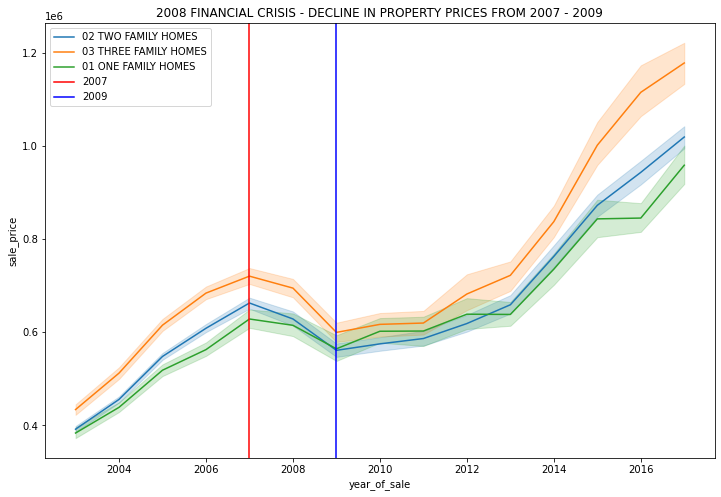

In [22]:
# Let's check the impact of 2008 financial crisis on price trend using lineplot. 

plt.figure(figsize=(12,8))
plt.title('2008 FINANCIAL CRISIS - DECLINE IN PROPERTY PRICES FROM 2007 - 2009')
sns.lineplot(x= df_copy5['year_of_sale'],y= df_copy5['sale_price'],hue= df_copy5['building_class_category'])
plt.axvline(2007,label = '2007',color = 'red')
plt.axvline(2009,label = '2009',color = 'blue')
plt.legend()
plt.show()

It can be clearly seen that the price of properties have declined during the period 2007 - 2009.

In [23]:
# So for our analysis we will consider all property sales that happened after 2008

df_copy6 = df_copy5[df_copy5['year_of_sale']>2008]

print('2009 - 2017')
print(f'Total number of rows     = {df_copy6.shape[0]}')
print(f'Total number of columns  = {df_copy6.shape[1]}')

2009 - 2017
Total number of rows     = 56659
Total number of columns  = 44


## Further cleaning based on distribution and data imbalance in features.

1. 'ComArea','CommFAR','OtherArea','NumBldgs' can be dropped 
2. 94.6% of the data points is 0 in 'ComArea'
3. 100% of the data points is 0 in 'CommFAR'
4. 99.25 % of the data points is 0 in 'OtherArea' feature
5. 'NumBldgs' is a categorical feature and 98.9% of the data is shared by numbers 1 and 2 .

In [24]:
# let's explore the above mentioned features

features_2 = ['ComArea','CommFAR','OtherArea','NumBldgs']

for i in features_2:
    print(i)
    print(df_copy6[i].value_counts(normalize=True).head())

ComArea
0.0       0.946204
1000.0    0.002542
1100.0    0.002065
900.0     0.001183
1089.0    0.001165
Name: ComArea, dtype: float64
CommFAR
0.0    0.973420
2.0    0.011807
1.0    0.009548
3.4    0.002559
4.0    0.001447
Name: CommFAR, dtype: float64
OtherArea
0.0       0.992587
1000.0    0.000653
1100.0    0.000618
900.0     0.000212
1200.0    0.000194
Name: OtherArea, dtype: float64
NumBldgs
1.0    0.761185
2.0    0.227890
0.0    0.006001
3.0    0.004130
4.0    0.000512
Name: NumBldgs, dtype: float64


In [25]:
# Let's drop the above features

df_copy7 = df_copy6.copy()

df_copy7.drop(columns= features_2,inplace=True)

In [26]:
df_copy7.head()

,neighborhood,building_class_category,block,lot,address,zip_code,land_sqft,gross_sqft,year_built,building_class_at_sale,sale_price,year_of_sale,CD,SchoolDist,Council,LandUse,LotArea,BldgArea,ResArea,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,FacilFAR,ZoneMap,SHAPE_Leng,SHAPE_Area
316,BOERUM HILL,02 TWO FAMILY HOMES,180,60,525 ATLANTIC AVENUE,11217,2000.0,4225.0,1905,S2,23000000.0,2013,302.0,15.0,33.0,4.0,2000.0,4225.0,2250.0,3.0,2.0,3.0,25.0,80.0,25.0,79.0,0.0,N,5.0,5.0,5685.0,35970.0,0.0,0.0,2.11,4.00,4.0,16c,222.353174,2045.471745
389,GOWANUS,02 TWO FAMILY HOMES,1015,43,470 4TH AVENUE,11215,15120.0,46000.0,1920,S2,20000000.0,2014,306.0,15.0,39.0,4.0,14076.0,92722.0,87424.0,12.0,105.0,107.0,126.0,120.0,126.0,120.0,0.0,Y,5.0,2.0,910350.0,2826386.0,2015.0,0.0,6.59,6.00,6.0,16d,463.497871,13360.748269
398,PARK SLOPE SOUTH,03 THREE FAMILY HOMES,1047,3,555 4 AVENUE,11215,1800.0,2700.0,1899,C0,19875000.0,2016,307.0,15.0,39.0,11.0,14400.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,N,5.0,5.0,106200.0,106200.0,0.0,0.0,0.00,6.00,6.0,16d,509.254415,14989.874050
469,GREENPOINT,02 TWO FAMILY HOMES,2505,3,1050 MANHATTAN AVENUE,11222,2500.0,3000.0,1931,S2,18000000.0,2015,301.0,14.0,33.0,4.0,2500.0,3000.0,2000.0,3.0,2.0,3.0,25.0,100.0,25.0,40.0,0.0,N,5.0,5.0,9606.0,36504.0,1998.0,0.0,1.20,4.00,4.0,13a,251.683063,2490.908615
576,COBBLE HILL,01 ONE FAMILY HOMES,286,41,177 PACIFIC STREET,11201,2513.0,10000.0,1931,A9,15500000.0,2015,306.0,15.0,39.0,1.0,2513.0,7500.0,7500.0,3.0,1.0,1.0,25.0,100.5,25.0,100.0,3.0,N,5.0,2.0,35923.0,101124.0,0.0,0.0,2.98,2.43,4.8,16c,256.846770,2765.347371


In [27]:
''' In certain features we can find the value to be 0. This is not a desirable value because it is impossible for certain 
data points to take the value 0. we can fill it mean, median or mode based on the distribution.'''

'''But before doing so let's check the percentage of records that hold zero as value in their numerical features. If it is
less than 3% then we can drop the rows'''

total_records = df_copy7.shape[0]

non_zero_records = df_copy7[(df_copy7['land_sqft'] != 0)& (df_copy7['gross_sqft'] != 0)&
         (df_copy7['SHAPE_Leng'] != 0)& (df_copy7['SHAPE_Area'] != 0)&
        (df_copy7['LotArea'] != 0)& (df_copy7['BldgArea'] != 0)&
        (df_copy7['BuiltFAR']!= 0) &(df_copy7['ResidFAR']!= 0)&(df_copy7['FacilFAR']!= 0)&
        (df_copy7['year_built'] != 0) &(df_copy7['BldgFront'] != 0)&(df_copy7['BldgDepth'] != 0)&
          (df_copy7['AssessTot'] != 0) &(df_copy7['AssessLand'] != 0)].shape[0]


percentage_loss =100 - (non_zero_records/total_records*100)

print('Total records = ',total_records)
print('Non zero records = ',non_zero_records )
print('Records lost due to elimination = ',total_records - non_zero_records)
print('Percentage of rows lost = ',round(percentage_loss,2) )

Total records =  56659
Non zero records =  55384
Records lost due to elimination =  1275
Percentage of rows lost =  2.25


 2.25 % is acceptable , so lets drop these records.

In [28]:
df_copy8 = df_copy7[(df_copy7['land_sqft'] != 0)& (df_copy7['gross_sqft'] != 0)&
         (df_copy7['SHAPE_Leng'] != 0)& (df_copy7['SHAPE_Area'] != 0)&
        (df_copy7['LotArea'] != 0)& (df_copy7['BldgArea'] != 0)&
        (df_copy7['BuiltFAR']!= 0) &(df_copy7['ResidFAR']!= 0)&(df_copy7['FacilFAR']!= 0)&
        (df_copy7['year_built'] != 0) &(df_copy7['BldgFront'] != 0)&(df_copy7['BldgDepth'] != 0)&
          (df_copy7['AssessTot'] != 0) &(df_copy7['AssessLand'] != 0)]


In [29]:
# now let's convert the two features 'YearAlter1' and 'YearAlter2' into single feature.
# A new feauture containing total number of alterations.

# let's create a variable to store boolean values for 'YearAlter1': 0 if no alteration took place and 1 if alteration happened.

First_Alter = df_copy8['YearAlter1'].map(lambda x : 1 if x != 0 else 0)

# let's create a variable to store boolean values for 'YearAlter2': 0 if no alteration took place and 1 if alteration happened.

Second_Alter = df_copy8['YearAlter2'].map(lambda x : 1 if x != 0 else 0)

# Now we will store the sum in a dataframe

Total_number_of_aterations= pd.DataFrame(First_Alter + Second_Alter).rename(columns = {0:'Total_alterations'})

# Let's add this to our original dataframe

df_copy9 = df_copy8.copy()

df_copy9['Total_alterations'] = Total_number_of_aterations

# now drop the two features 'YearAlter1' and 'YearAlter2'

df_copy9.drop(columns= ['YearAlter1','YearAlter2'],inplace=True)

In [30]:
df_copy9.head()

,neighborhood,building_class_category,block,lot,address,zip_code,land_sqft,gross_sqft,year_built,building_class_at_sale,sale_price,year_of_sale,CD,SchoolDist,Council,LandUse,LotArea,BldgArea,ResArea,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,ZoneMap,SHAPE_Leng,SHAPE_Area,Total_alterations
316,BOERUM HILL,02 TWO FAMILY HOMES,180,60,525 ATLANTIC AVENUE,11217,2000.0,4225.0,1905,S2,23000000.0,2013,302.0,15.0,33.0,4.0,2000.0,4225.0,2250.0,3.0,2.0,3.0,25.0,80.0,25.0,79.0,0.0,N,5.0,5.0,5685.0,35970.0,2.11,4.00,4.0,16c,222.353174,2045.471745,0
389,GOWANUS,02 TWO FAMILY HOMES,1015,43,470 4TH AVENUE,11215,15120.0,46000.0,1920,S2,20000000.0,2014,306.0,15.0,39.0,4.0,14076.0,92722.0,87424.0,12.0,105.0,107.0,126.0,120.0,126.0,120.0,0.0,Y,5.0,2.0,910350.0,2826386.0,6.59,6.00,6.0,16d,463.497871,13360.748269,1
469,GREENPOINT,02 TWO FAMILY HOMES,2505,3,1050 MANHATTAN AVENUE,11222,2500.0,3000.0,1931,S2,18000000.0,2015,301.0,14.0,33.0,4.0,2500.0,3000.0,2000.0,3.0,2.0,3.0,25.0,100.0,25.0,40.0,0.0,N,5.0,5.0,9606.0,36504.0,1.20,4.00,4.0,13a,251.683063,2490.908615,1
576,COBBLE HILL,01 ONE FAMILY HOMES,286,41,177 PACIFIC STREET,11201,2513.0,10000.0,1931,A9,15500000.0,2015,306.0,15.0,39.0,1.0,2513.0,7500.0,7500.0,3.0,1.0,1.0,25.0,100.5,25.0,100.0,3.0,N,5.0,2.0,35923.0,101124.0,2.98,2.43,4.8,16c,256.846770,2765.347371,0
613,OCEAN PARKWAY-SOUTH,03 THREE FAMILY HOMES,7174,85,42 SOUTHGATE,11223,1600.0,2496.0,1925,C0,15000000.0,2015,315.0,21.0,47.0,2.0,1600.0,2496.0,1664.0,2.0,3.0,3.0,20.0,80.0,16.0,52.0,2.0,N,5.0,1.0,4764.0,28853.0,1.56,0.90,2.0,28c,205.504713,1752.627502,0


In [31]:
# now let's create a list containing numerical features for numerical analysis

numericals = ['land_sqft','gross_sqft','sale_price','LotArea','BldgArea','ResArea','LotFront','LotDepth',
                'BldgFront','BldgDepth','AssessLand','AssessTot','BuiltFAR','ResidFAR','FacilFAR','SHAPE_Leng','SHAPE_Area']

df_num  = df_copy9[numericals]

skewness in land_sqft = 9.62
skewness in gross_sqft = 12.04
skewness in sale_price = 5.71
skewness in LotArea = 9.6
skewness in BldgArea = 21.73
skewness in ResArea = 21.59
skewness in LotFront = 105.87
skewness in LotDepth = 6.44
skewness in BldgFront = 8.59
skewness in BldgDepth = 106.64
skewness in AssessLand = 26.08
skewness in AssessTot = 27.63
skewness in BuiltFAR = 2.56
skewness in ResidFAR = 0.99
skewness in FacilFAR = 1.07
skewness in SHAPE_Leng = 0.9
skewness in SHAPE_Area = 3.55


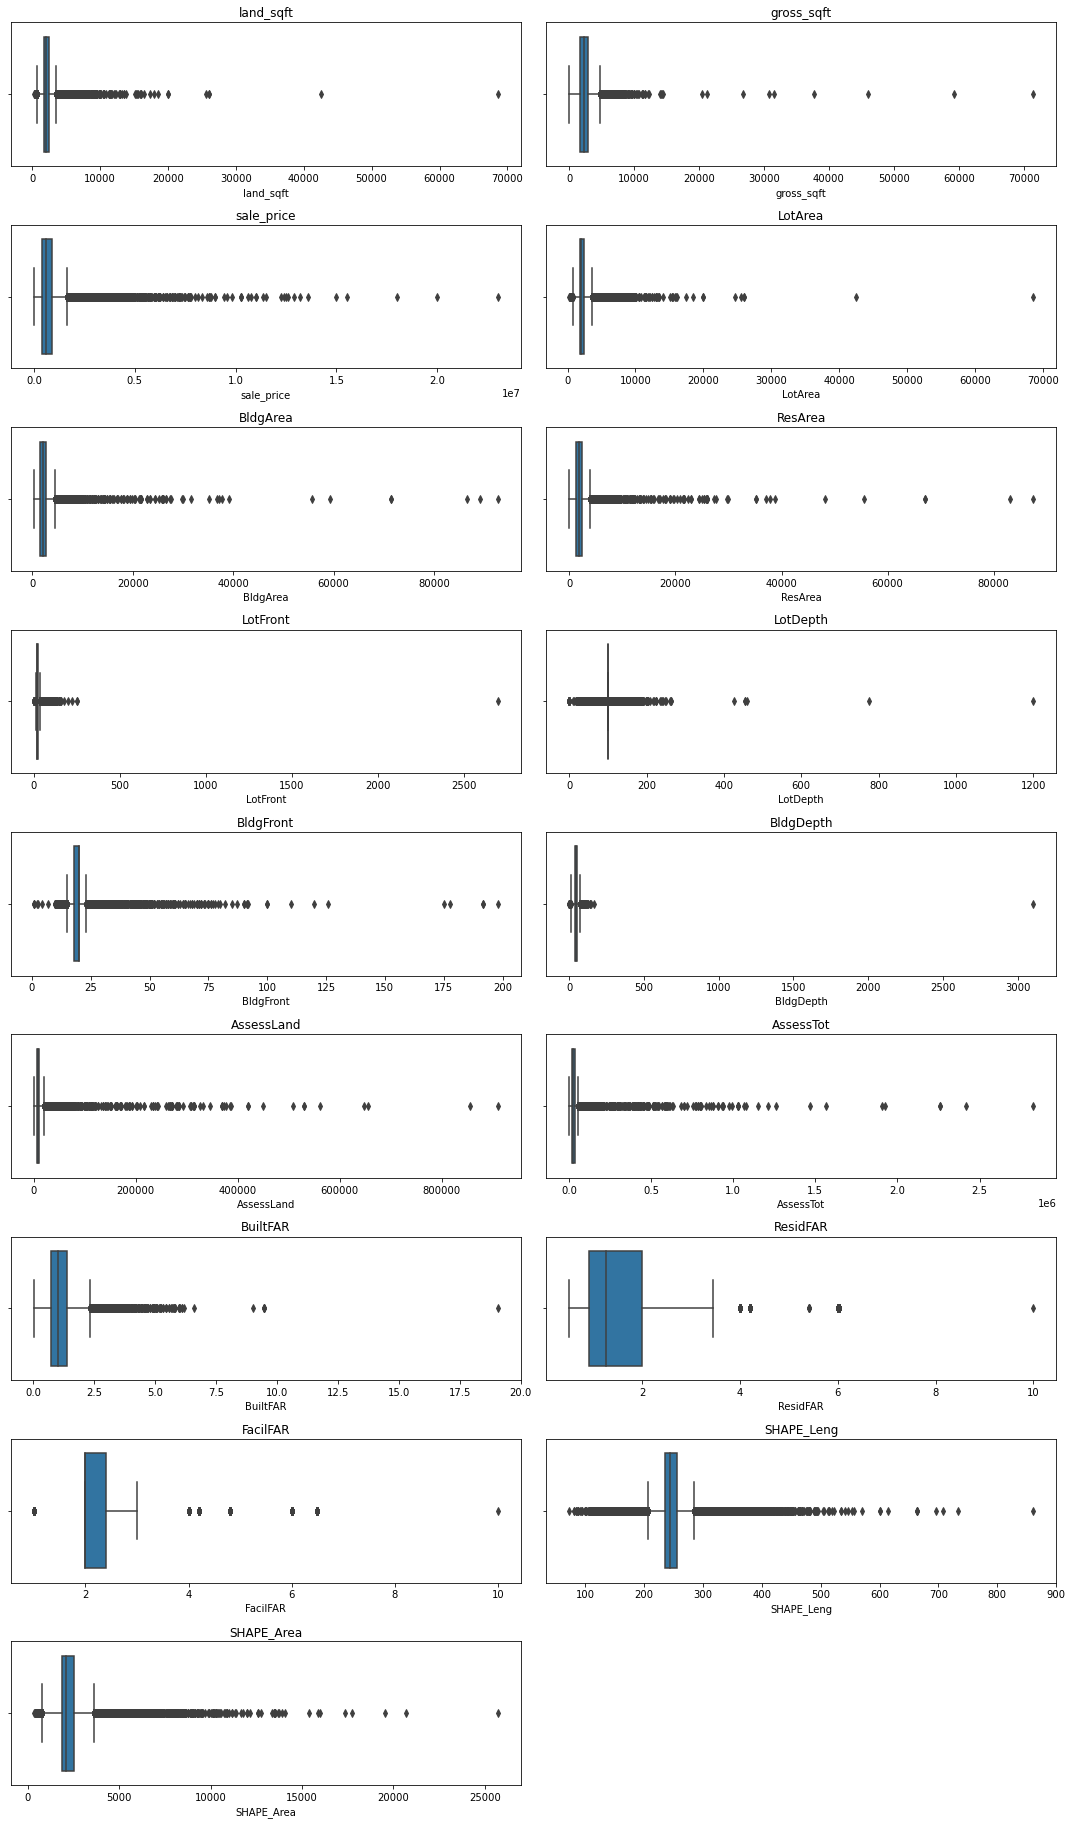

In [32]:
# Let's check the skewness in numerical features

n = 1
plt.figure(figsize=(15,25))
for i in numericals:
    if n <=17:
        plt.tight_layout()
        plt.subplot(9,2,n)
        plt.title(i)
        sns.boxplot(df_num[i])
        n+=1
        print(f'skewness in {i} = {round(df_num[i].skew(),2)}')

In [33]:
# below is a custom function to print n highest values from each feature.  
# (typically used to find outliers on one extreme side) 

def maximums(n):
    for i in numericals:
        empty = df_num
        print('\n')
        print(i)
        for j in range(n):
            print((empty[empty[i] == empty[i].max()][i].values))
            empty = empty[empty[i]<empty[i].max()]

maximums(5)



land_sqft
[68600.]
[42500.]
[25996. 25996.]
[25608.]
[20003.]


gross_sqft
[71448.]
[59212.]
[46000.]
[37751.]
[31594.]


sale_price
[23000000.]
[20000000.]
[18000000.]
[15500000.]
[15000000.]


LotArea
[68600.]
[42500.]
[25996. 25996.]
[25608.]
[24600.]


BldgArea
[92722.]
[89243.]
[86662.]
[71448. 71448.]
[59212.]


ResArea
[87424.]
[83062.]
[67086. 67086.]
[55618.]
[48130.]


LotFront
[2696.]
[249.75 249.75]
[220.]
[200.]
[177.5]


LotDepth
[1200.]
[776.]
[460.83]
[455.42 455.42]
[425.]


BldgFront
[198.]
[191.83 191.83]
[177.5]
[175.]
[126.]


BldgDepth
[3104.]
[164.92]
[144.]
[140. 140.]
[127.79]


AssessLand
[910350.]
[855000.]
[654750.]
[648000.]
[561600.]


AssessTot
[2826386.]
[2417850.]
[2259000. 2259000.]
[1921500.]
[1908450.]


BuiltFAR
[19.07]
[9.46 9.46 9.46 9.46]
[9.02]
[6.59]
[6.2]


ResidFAR
[10.]
[6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02
 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02 6.02
 6.02 6.02 6.02 6.02 6.02 6.02

# observations on outliers (less than 10 records affecting the skewness)
'''During our observation we have to check both the skewness and the number of outliers in the boxplot'''

'land_sqft'
 There are 5 values above 23000.

'gross_sqft'
 There are 6 values above 30000.

'sale_price'
 There are 5 values above 15000000.
    
'LotArea'
 There are 6 values above 21000.

'BldgArea'
 There are 7 values above 50000.

'ResArea'
 There are 6 values above 40000.
    
'LotFront'
 There are 4 values above 200.

'LotDepth'
 There are 6 values above 270.

'BldgFront'
 There are 5 values above 126.

'BldgDepth'
 There is 1 value above 165.
    
'AssessLand'
 There are 8 values above 509000.
    
'AssessTot'
 There are 6 values above 1600000.
    
'BuiltFAR'
 There are 6 values above 7.

'ResidFAR'
 There is 1 value above 6.2.
    
'FacilFAR'
 There is 1 value above 6.5.
    
'SHAPE_Leng'
 There is 1 value above 800.
    
'SHAPE_Area'
 There are 8 values above 15000.
    
88 records are huge outliers.

skewness in land_sqft = 1.83
skewness in gross_sqft = 0.52
skewness in sale_price = 1.94
skewness in LotArea = 1.83
skewness in BldgArea = 0.7
skewness in ResArea = 0.86
skewness in LotFront = 2.14
skewness in LotDepth = -1.88
skewness in BldgFront = 1.27
skewness in BldgDepth = 0.27
skewness in AssessLand = 1.19
skewness in AssessTot = 1.18
skewness in BuiltFAR = 0.75
skewness in ResidFAR = 0.67
skewness in FacilFAR = 1.05
skewness in SHAPE_Leng = -0.49
skewness in SHAPE_Area = 1.7


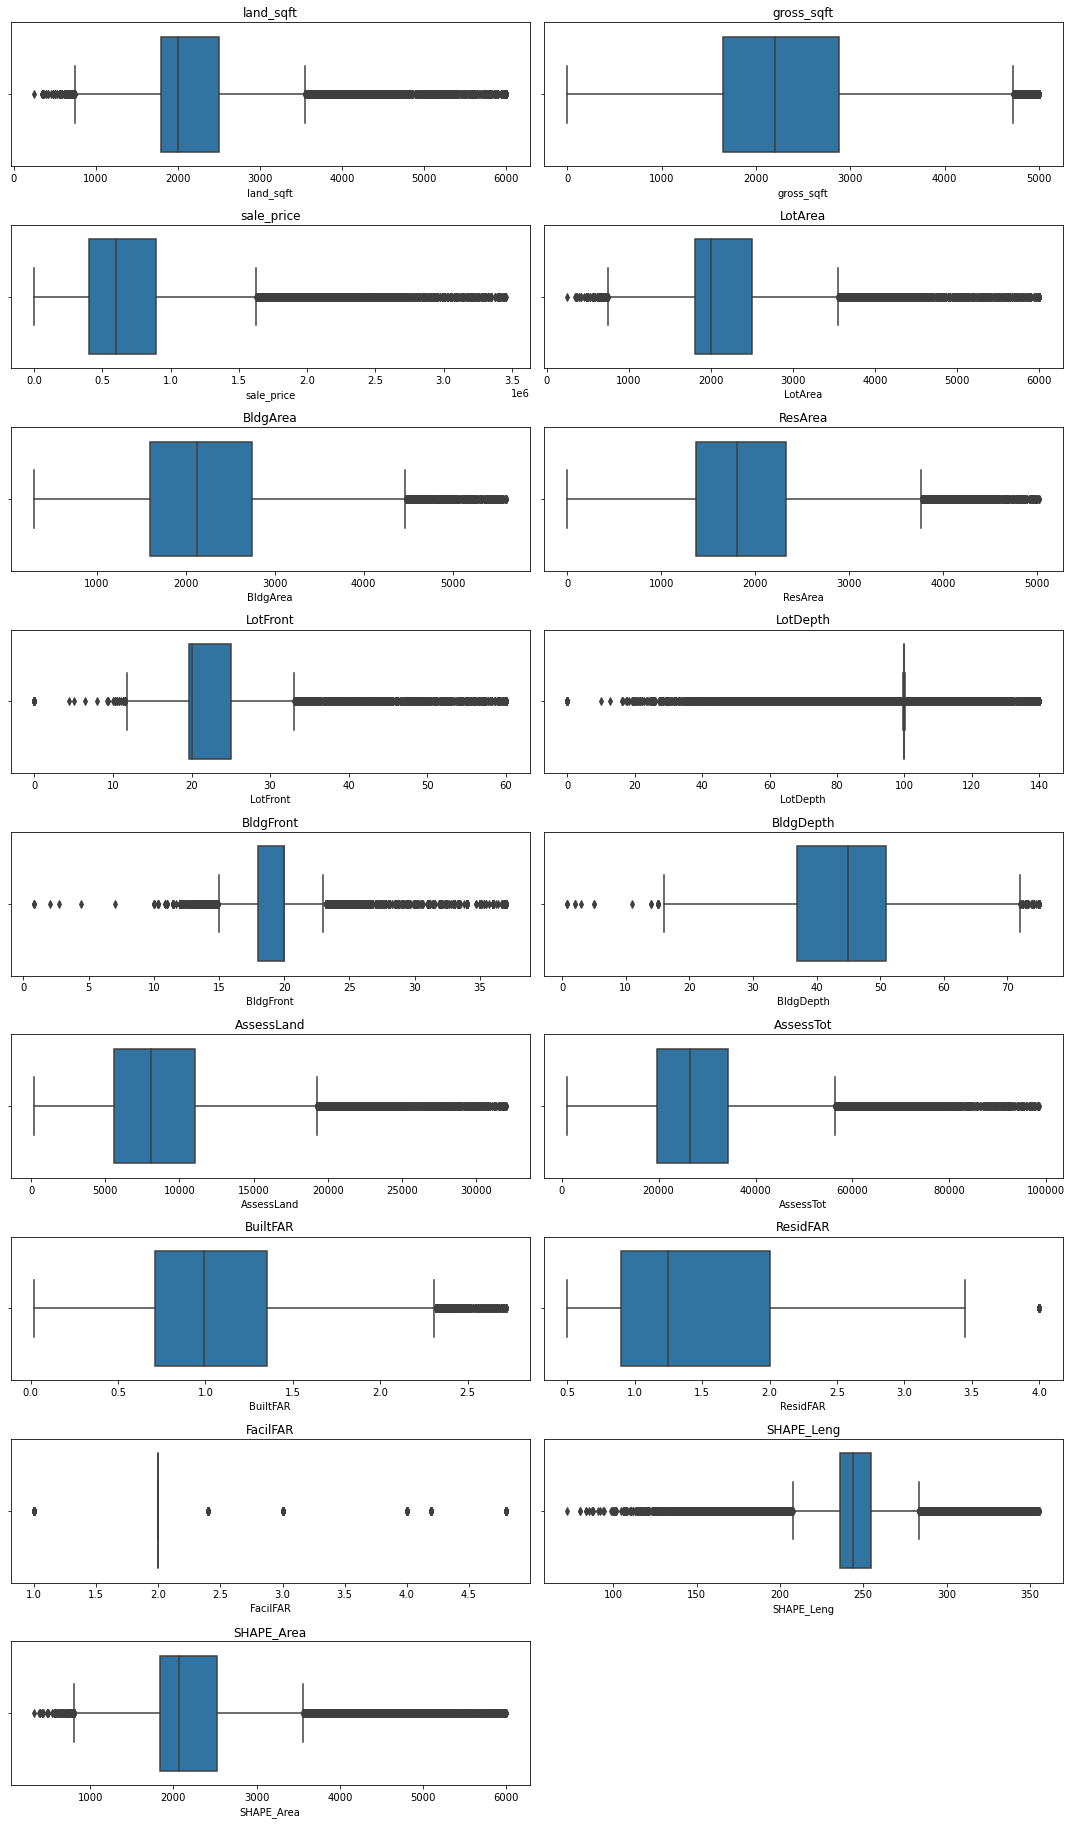

In [34]:
# now let's check the skewness with less than 0.99 percentile values in each feature

n = 1
plt.figure(figsize=(15,25))
for i in numericals:
    if n <=17:
        plt.tight_layout()
        plt.subplot(9,2,n)
        plt.title(i)
        sns.boxplot(df_num[df_num[i] <= df_num[i].quantile(0.99)][i])
        n+=1
    print(f'skewness in {i} = {round(df_num[df_num[i] <= df_num[i].quantile(0.99)][i].skew(),2)}')

In [35]:
#Let's find out the number of records that cound be potentially lost when we use 0.99 quantile for each feature

percentage = []
num_feature = []

for i in numericals:
    print(i)
    print('0.99 quantile rows =',len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))
    print(f'Percentage loss = {round(100*(1 - ((len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))/len(df_num[i]))),4)}%')
    percentage.append(round(100*(1 - ((len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))/len(df_num[i]))),4))
    num_feature.append(i)

land_sqft
0.99 quantile rows = 55000
Percentage loss = 0.6933%
gross_sqft
0.99 quantile rows = 54844
Percentage loss = 0.975%
sale_price
0.99 quantile rows = 54830
Percentage loss = 1.0003%
LotArea
0.99 quantile rows = 54985
Percentage loss = 0.7204%
BldgArea
0.99 quantile rows = 54834
Percentage loss = 0.9931%
ResArea
0.99 quantile rows = 54830
Percentage loss = 1.0003%
LotFront
0.99 quantile rows = 54911
Percentage loss = 0.854%
LotDepth
0.99 quantile rows = 54838
Percentage loss = 0.9858%
BldgFront
0.99 quantile rows = 54843
Percentage loss = 0.9768%
BldgDepth
0.99 quantile rows = 54916
Percentage loss = 0.845%
AssessLand
0.99 quantile rows = 54830
Percentage loss = 1.0003%
AssessTot
0.99 quantile rows = 54830
Percentage loss = 1.0003%
BuiltFAR
0.99 quantile rows = 54830
Percentage loss = 1.0003%
ResidFAR
0.99 quantile rows = 55206
Percentage loss = 0.3214%
FacilFAR
0.99 quantile rows = 55251
Percentage loss = 0.2401%
SHAPE_Leng
0.99 quantile rows = 54831
Percentage loss = 0.9985%
S

In [36]:
# Let's create a comparison table for skewness obtained from different methods

percentage = []
num_feature = []
skewness = []
original_skew = []
sqrt = []
for i in numericals:
    #print(i)
    #print('0.99 quantile rows =',len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))
    #print(f'Percentage loss = {round(100*(1 - ((len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))/len(df_num[i]))),4)}%')
    percentage.append(round(100*(1 - ((len(df_num[df_num[i] <= df_num[i].quantile(0.99)][i]))/len(df_num[i]))),4))
    num_feature.append(i)
    skewness.append(round(df_num[df_num[i] <= df_num[i].quantile(0.99)][i].skew(),2))
    original_skew.append(round(df_num[i].skew(),2))
    sqrt.append(round((np.sqrt(df[i])).skew(),2))
skew_table = pd.DataFrame({'numerical_feature':num_feature,'original_skew':original_skew,'percentage_loss (0.99)':percentage,
                           'new skewness 0.99':skewness,'sqaure_root_skewness':sqrt})
skew_table

,numerical_feature,original_skew,percentage_loss (0.99),new skewness 0.99,sqaure_root_skewness
0,land_sqft,9.62,0.6933,1.83,9.55
1,gross_sqft,12.04,0.9750,0.52,4.58
2,sale_price,5.71,1.0003,1.94,3.71
3,LotArea,9.60,0.7204,1.83,4.62
4,BldgArea,21.73,0.9931,0.70,3.52
5,ResArea,21.59,1.0003,0.86,3.52
6,LotFront,105.87,0.8540,2.14,3.29
7,LotDepth,6.44,0.9858,-1.88,4.04
8,BldgFront,8.59,0.9768,1.27,2.24
9,BldgDepth,106.64,0.8450,0.27,0.82


# Observation:

It is very evident from the above table that outliers are affecting the skew and have to be removed. Even square root 
transformation is not enough to reduce the skewness.

since we are having some of the values as 0 in three of the numerical features Log transformation is not possible.

Now let's try to remove some extreme outliers and check how skewness is reducing.

skewness in land_sqft = 1.7760779586657176
skewness in gross_sqft = 0.4992235367829704
skewness in sale_price = 1.4270530808803001
skewness in LotArea = 1.757277783559955
skewness in BldgArea = 1.5918217554290148
skewness in ResArea = 1.7529241431051497
skewness in LotFront = 2.272559477546596
skewness in LotDepth = -1.479526439394065
skewness in BldgFront = 2.442838295038464
skewness in BldgDepth = 0.19426139814282947
skewness in AssessLand = 3.7979887848067535
skewness in AssessTot = 4.35138707562614
skewness in BuiltFAR = 0.6472835714553391
skewness in ResidFAR = 0.3612451103473824
skewness in FacilFAR = 0.7752268391662491
skewness in SHAPE_Leng = -0.16321275870158725
skewness in SHAPE_Area = 1.7138292985637005


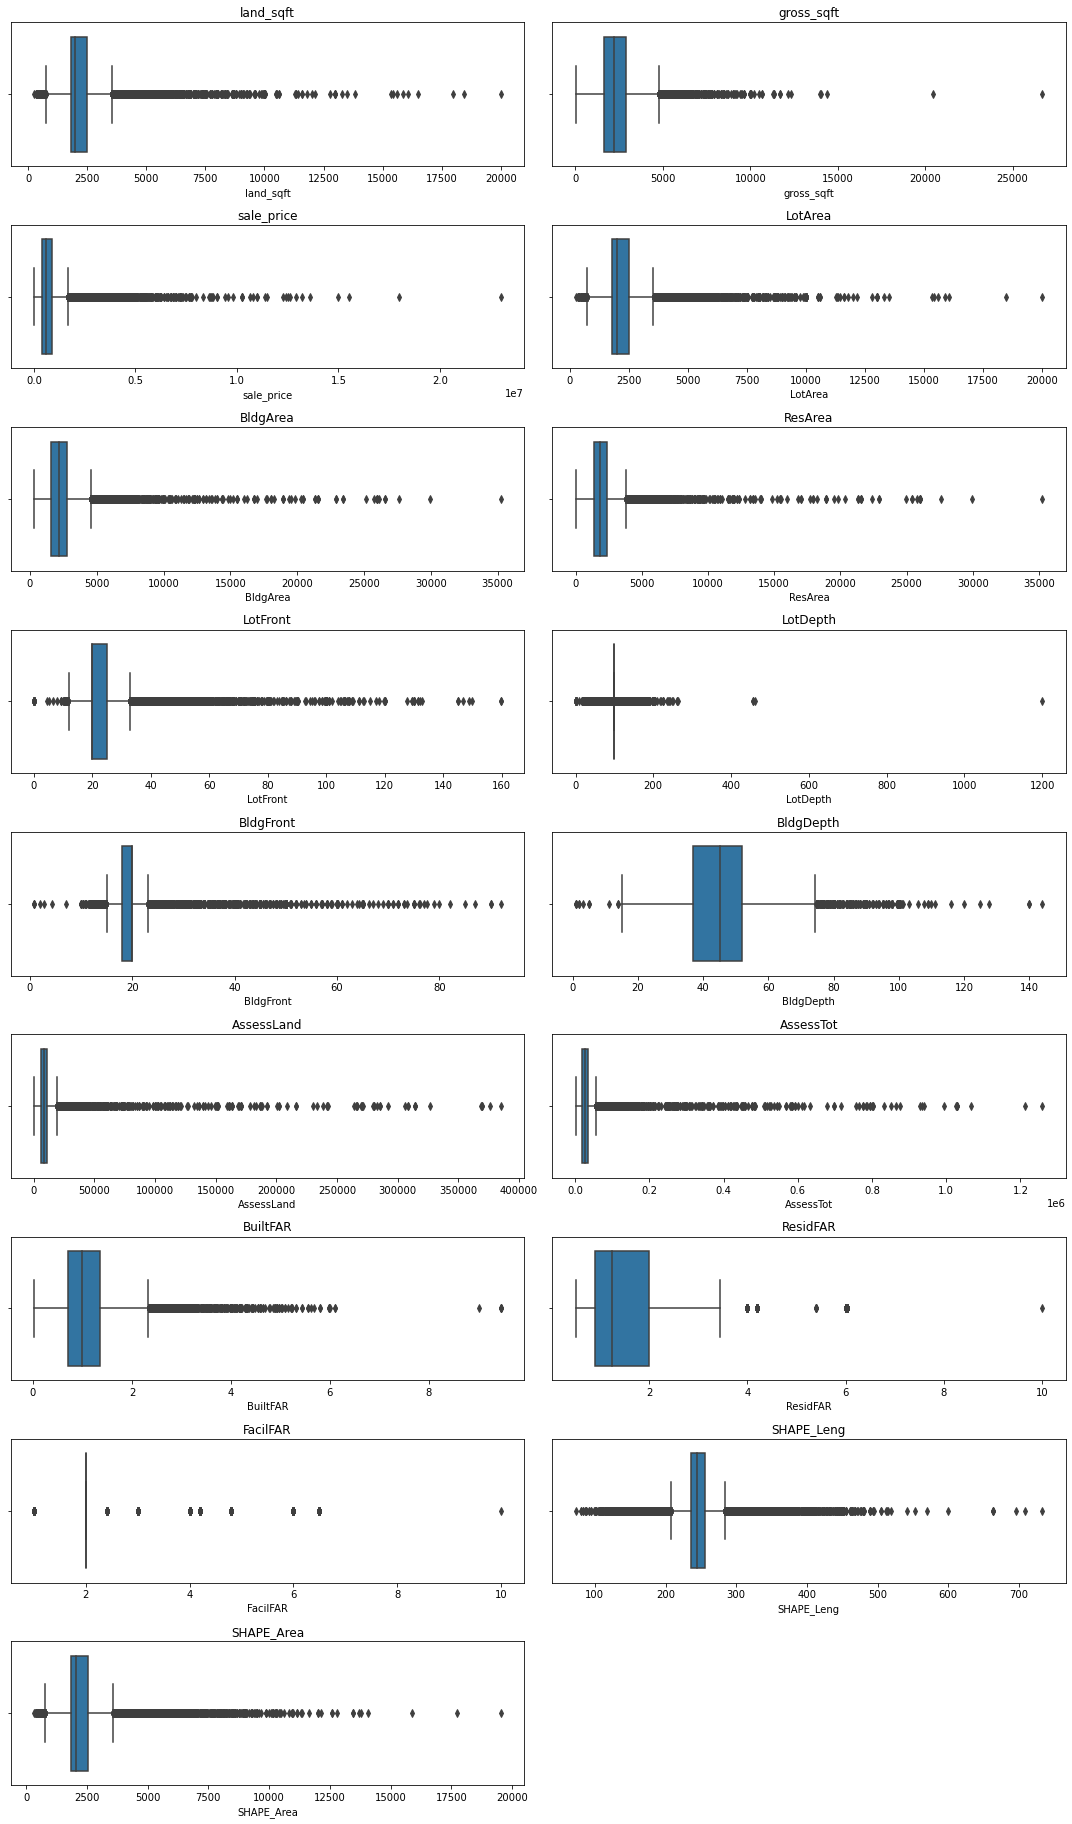

In [37]:
# From the observation of Outliers cell we have found out above which value extreme outliers are present in each feature.
# Let's use that to eliminate outliers and check skewness with square root transformation 

n = 1
plt.figure(figsize=(15,25))
for i in numericals:
    if n <=17:
        plt.tight_layout()
        plt.subplot(9,2,n)
        plt.title(i)
        k = df_copy9[(df_copy9['LotFront']< 210) & (df_copy9['BldgDepth']< 170) & (df_copy9['AssessLand']< 409100) &
                    (df_copy9['AssessTot']< 1409000) & (df_copy9['BldgArea']< 50500) & (df_copy9['land_sqft']< 23100)
                    & (df_copy9['ResArea']< 40100) & (df_copy9['gross_sqft']< 30000) & (df_copy9['BldgFront']< 100)][i]
        sns.boxplot(k)
        n+=1
        print(f'skewness in {i} = {np.sqrt(k).skew()}')

Even after removing outliers and doing square root transformation we are not able to reduce the skewness of all features to
under 1.5. 

So we have to carry out log transformation.

In [38]:
for i in numericals:
     k = df_copy9[(df_copy9['LotFront']< 210) & (df_copy9['BldgDepth']< 170) & (df_copy9['AssessLand']< 409100) &
                    (df_copy9['AssessTot']< 1409000) & (df_copy9['BldgArea']< 50500) & (df_copy9['land_sqft']< 23100)
                    & (df_copy9['ResArea']< 40100) & (df_copy9['gross_sqft']< 30000) & (df_copy9['BldgFront']< 100)][i]
     print(f'skewness in {i} = {round(np.log(k).skew(),2)}')

skewness in land_sqft = 0.73
skewness in gross_sqft = -0.38
skewness in sale_price = -1.61
skewness in LotArea = 0.73
skewness in BldgArea = 0.12
skewness in ResArea = nan
skewness in LotFront = nan
skewness in LotDepth = nan
skewness in BldgFront = 0.94
skewness in BldgDepth = -0.53
skewness in AssessLand = -0.08
skewness in AssessTot = 0.03
skewness in BuiltFAR = -0.16
skewness in ResidFAR = -0.12
skewness in FacilFAR = 0.31
skewness in SHAPE_Leng = -0.93
skewness in SHAPE_Area = 0.75


As you can see, three features are displaying 'nan' when we do log trasformation.

This is beacause we have 0 in those features. ('ResArea' , 'LotFront' , 'LotDepth')

Let's treat these 0 with proper imputations inorder to carry out Log transformation

In [39]:
# Let's check the 'number of records that have 0 as value in ''ResArea'' feature

print('number of records that have 0 as value in ''ResArea'' feature = ',df_copy9[df_copy9['ResArea'] == 0].shape[0])

print('\n')

print('NUmber of records having identical value in ''BldgArea'' & ''ResArea'' =  ',
      df_copy9[df_copy9['ResArea'] == df_copy9['BldgArea']].shape[0])

print('Percentage of records having identical value in ''BldgArea'' & ''ResArea'' =  ',
      round(df_copy9[df_copy9['ResArea'] == df_copy9['BldgArea']].shape[0]/df_copy9.shape[0],3)*100)
print('\n')

# since 'LotFront' and 'LotDepth' features area heavily skewed we have to fill the zeros in them with median.

print('Median value of ''LotFront'' = ',df_copy9['LotFront'].median())

print('Median value of ''LotDepth'' = ',df_copy9['LotDepth'].median())

number of records that have 0 as value in ResArea feature =  60


NUmber of records having identical value in BldgArea & ResArea =   35183
Percentage of records having identical value in BldgArea & ResArea =   63.5


Median value of LotFront =  20.0
Median value of LotDepth =  100.0


since in 63.5% of the records Building area is equal to residential area we can impute the data points of residential area 
feature where value is 0 to value present in Building area feature  

In [40]:
# Let's impute the 0s in all 3 features.

# a copy of previous dataframe is created
df_copy10 = df_copy9.copy()

# a for loop is used to find data points where value is 0 and impute them

for i in range(len(df_copy10)):
    if df_copy10['ResArea'].values[i] == 0:
        df_copy10['ResArea'].values[i] = df_copy10['BldgArea'].values[i]
    
    if df_copy10['LotFront'].values[i] == 0:
        df_copy10['LotFront'].values[i] = df_copy10['LotFront'].median()
    
    if df_copy10['LotDepth'].values[i] == 0:
        df_copy10['LotDepth'].values[i] = df_copy10['LotFront'].median()

m = 0
for i in range(len(df_copy10)):
    if df_copy10['BldgArea'].values[i] == df_copy10['ResArea'].values[i]:
        m += 1
print(m)


35243


In [41]:
log_skew = []
for i in numericals:
    k = df_copy10[(df_copy10['LotFront']< 210) & (df_copy10['BldgDepth']< 170) & (df_copy10['AssessLand']< 409100) &
                    (df_copy10['AssessTot']< 1409000) & (df_copy10['BldgArea']< 50500) & (df_copy10['land_sqft']< 23100)
                    & (df_copy10['ResArea']< 40100) & (df_copy10['gross_sqft']< 30000) & (df_copy10['BldgFront']< 100)
                 & (df_copy10['LotDepth']< 400)][i]
    print(f'skewness in {i} = {round(np.log(k).skew(),2)}')
    log_skew.append(round(np.log(k).skew(),2))

skew_table['Log skew'] = log_skew

skewness in land_sqft = 0.73
skewness in gross_sqft = -0.38
skewness in sale_price = -1.61
skewness in LotArea = 0.73
skewness in BldgArea = 0.12
skewness in ResArea = 0.33
skewness in LotFront = 1.64
skewness in LotDepth = -2.86
skewness in BldgFront = 0.94
skewness in BldgDepth = -0.53
skewness in AssessLand = -0.08
skewness in AssessTot = 0.03
skewness in BuiltFAR = -0.16
skewness in ResidFAR = -0.12
skewness in FacilFAR = 0.31
skewness in SHAPE_Leng = -0.92
skewness in SHAPE_Area = 0.75


In [42]:
skew_table

,numerical_feature,original_skew,percentage_loss (0.99),new skewness 0.99,sqaure_root_skewness,Log skew
0,land_sqft,9.62,0.6933,1.83,9.55,0.73
1,gross_sqft,12.04,0.9750,0.52,4.58,-0.38
2,sale_price,5.71,1.0003,1.94,3.71,-1.61
3,LotArea,9.60,0.7204,1.83,4.62,0.73
4,BldgArea,21.73,0.9931,0.70,3.52,0.12
5,ResArea,21.59,1.0003,0.86,3.52,0.33
6,LotFront,105.87,0.8540,2.14,3.29,1.64
7,LotDepth,6.44,0.9858,-1.88,4.04,-2.86
8,BldgFront,8.59,0.9768,1.27,2.24,0.94
9,BldgDepth,106.64,0.8450,0.27,0.82,-0.53


 # observation
    
    From the above table we can conclude that log trasformation is good for all features except 'LotDepth'.

count    55344.000000
mean        96.840700
std         15.576373
min         10.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        262.250000
Name: LotDepth, dtype: float64
skewness without transforamtion =  -0.54


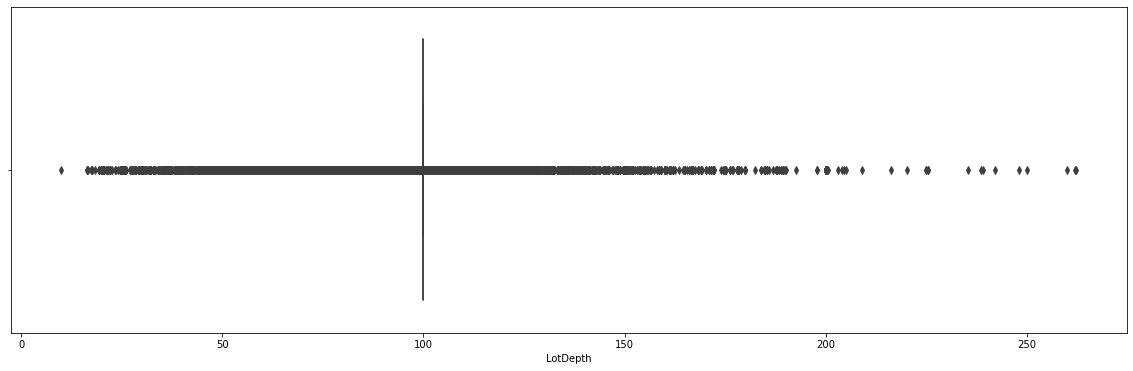

In [43]:
# Let's check LotDepth with a boxplot

k = df_copy10[(df_copy10['LotFront']< 210) & (df_copy10['BldgDepth']< 170) & (df_copy10['AssessLand']< 409100) &
                    (df_copy10['AssessTot']< 1409000) & (df_copy10['BldgArea']< 50500) & (df_copy10['land_sqft']< 23100)
                    & (df_copy10['ResArea']< 40100) & (df_copy10['gross_sqft']< 30000) & (df_copy10['BldgFront']< 100)
                      & (df_copy10['LotDepth']< 400)]['LotDepth']

plt.figure(figsize=(20,6))
sns.boxplot(k)

# five point summary for 'LotDepth' feature
print(k.describe())

# finding the skewness for 'LotDepth' .
print('skewness without transforamtion = ',round(k.skew(),2))

In [ ]:
# now let's create a new data frame that contains trasnformed numerical features.

df_copy11 = df_copy10[(df_copy10['LotFront']< 210) & (df_copy10['BldgDepth']< 170) & (df_copy10['AssessLand']< 409100) &
                    (df_copy10['AssessTot']< 1409000) & (df_copy10['BldgArea']< 50500) & (df_copy10['land_sqft']< 23100)
                    & (df_copy10['ResArea']< 40100) & (df_copy10['gross_sqft']< 30000) & (df_copy10['BldgFront']< 100)
                      & (df_copy10['LotDepth']< 400)].copy()

for i in numericals:
    df_copy11[i] = np.log(df_copy11[i])


In [45]:
df_copy11.head()

,neighborhood,building_class_category,block,lot,address,zip_code,land_sqft,gross_sqft,year_built,building_class_at_sale,sale_price,year_of_sale,CD,SchoolDist,Council,LandUse,LotArea,BldgArea,ResArea,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,ZoneMap,SHAPE_Leng,SHAPE_Area,Total_alterations
316,BOERUM HILL,02 TWO FAMILY HOMES,180,60,525 ATLANTIC AVENUE,11217,7.600902,8.348775,1905,S2,16.951005,2013,302.0,15.0,33.0,4.0,7.600902,8.348775,7.718685,3.0,2.0,3.0,3.218876,4.382027,3.218876,4.369448,0.0,N,5.0,5.0,8.645586,10.490441,0.746688,1.386294,1.386294,16c,5.404267,7.623384,0
469,GREENPOINT,02 TWO FAMILY HOMES,2505,3,1050 MANHATTAN AVENUE,11222,7.824046,8.006368,1931,S2,16.705882,2015,301.0,14.0,33.0,4.0,7.824046,8.006368,7.600902,3.0,2.0,3.0,3.218876,4.605170,3.218876,3.688879,0.0,N,5.0,5.0,9.170143,10.505177,0.182322,1.386294,1.386294,13a,5.528171,7.820403,1
576,COBBLE HILL,01 ONE FAMILY HOMES,286,41,177 PACIFIC STREET,11201,7.829233,9.210340,1931,A9,16.556351,2015,306.0,15.0,39.0,1.0,7.829233,8.922658,8.922658,3.0,1.0,1.0,3.218876,4.610158,3.218876,4.605170,3.0,N,5.0,2.0,10.489133,11.524103,1.091923,0.887891,1.568616,16c,5.548480,7.924922,0
613,OCEAN PARKWAY-SOUTH,03 THREE FAMILY HOMES,7174,85,42 SOUTHGATE,11223,7.377759,7.822445,1925,C0,16.523561,2015,315.0,21.0,47.0,2.0,7.377759,7.822445,7.416980,2.0,3.0,3.0,2.995732,4.382027,2.772589,3.951244,2.0,N,5.0,1.0,8.468843,10.269969,0.444686,-0.105361,0.693147,28c,5.325469,7.468871,0
693,BOERUM HILL,02 TWO FAMILY HOMES,279,17,163 COURT STREET,11201,7.854769,8.159375,1910,S2,16.425580,2016,302.0,15.0,33.0,4.0,7.854769,8.159375,7.758761,3.0,2.0,3.0,3.228826,4.617593,3.228826,3.583519,0.0,Y,5.0,5.0,9.851194,11.055641,0.307485,1.098612,1.098612,16c,5.576002,7.888821,1


In [46]:
# by using 'year_built' and 'year_of_sale' features, let's create a age feature

df_copy11['age'] = df_copy11['year_of_sale'] - df_copy11['year_built']

# another dataframe without negative age and number of floors less than 10 is created (to handle skewness in age feature)

df_copy12 = df_copy11[(df_copy11['age'] < 175)& (df_copy11['age'] > -1)&(df_copy11['NumFloors'] <10)].copy()

# Now let's replace all years with numbers in ascending order

df_copy12['year_of_sale'].replace({2009:1,2010:2,2011:3,2012:4,2013:5,2014:6,2015:7,2016:8,2017:9},inplace=True)

In [47]:
df_copy12.head()

,neighborhood,building_class_category,block,lot,address,zip_code,land_sqft,gross_sqft,year_built,building_class_at_sale,sale_price,year_of_sale,CD,SchoolDist,Council,LandUse,LotArea,BldgArea,ResArea,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,ZoneMap,SHAPE_Leng,SHAPE_Area,Total_alterations,age
316,BOERUM HILL,02 TWO FAMILY HOMES,180,60,525 ATLANTIC AVENUE,11217,7.600902,8.348775,1905,S2,16.951005,5,302.0,15.0,33.0,4.0,7.600902,8.348775,7.718685,3.0,2.0,3.0,3.218876,4.382027,3.218876,4.369448,0.0,N,5.0,5.0,8.645586,10.490441,0.746688,1.386294,1.386294,16c,5.404267,7.623384,0,108
469,GREENPOINT,02 TWO FAMILY HOMES,2505,3,1050 MANHATTAN AVENUE,11222,7.824046,8.006368,1931,S2,16.705882,7,301.0,14.0,33.0,4.0,7.824046,8.006368,7.600902,3.0,2.0,3.0,3.218876,4.605170,3.218876,3.688879,0.0,N,5.0,5.0,9.170143,10.505177,0.182322,1.386294,1.386294,13a,5.528171,7.820403,1,84
576,COBBLE HILL,01 ONE FAMILY HOMES,286,41,177 PACIFIC STREET,11201,7.829233,9.210340,1931,A9,16.556351,7,306.0,15.0,39.0,1.0,7.829233,8.922658,8.922658,3.0,1.0,1.0,3.218876,4.610158,3.218876,4.605170,3.0,N,5.0,2.0,10.489133,11.524103,1.091923,0.887891,1.568616,16c,5.548480,7.924922,0,84
613,OCEAN PARKWAY-SOUTH,03 THREE FAMILY HOMES,7174,85,42 SOUTHGATE,11223,7.377759,7.822445,1925,C0,16.523561,7,315.0,21.0,47.0,2.0,7.377759,7.822445,7.416980,2.0,3.0,3.0,2.995732,4.382027,2.772589,3.951244,2.0,N,5.0,1.0,8.468843,10.269969,0.444686,-0.105361,0.693147,28c,5.325469,7.468871,0,90
693,BOERUM HILL,02 TWO FAMILY HOMES,279,17,163 COURT STREET,11201,7.854769,8.159375,1910,S2,16.425580,8,302.0,15.0,33.0,4.0,7.854769,8.159375,7.758761,3.0,2.0,3.0,3.228826,4.617593,3.228826,3.583519,0.0,Y,5.0,5.0,9.851194,11.055641,0.307485,1.098612,1.098612,16c,5.576002,7.888821,1,106


## let's create a new copy of our latest dataframe and drop unwanted featrues before we build our base model building

'block','lot', 'address','zip_code' - these features are too specific.

'year_built' - since we have created age feature, this feature is not required.

'CD' and 'Council' - these are categorical features.

'ZoneMap' - this feature is for government use

'UnitsRes', 'UnitsTotal' - these features can be dropped.


In [48]:
df_copy13 = df_copy12.copy()

df_copy13.drop(columns=['block','lot', 'address','zip_code','year_built','CD','Council','ZoneMap',
                        'UnitsRes', 'UnitsTotal'],inplace=True)

In [49]:
df_copy13.head()

,neighborhood,building_class_category,land_sqft,gross_sqft,building_class_at_sale,sale_price,year_of_sale,SchoolDist,LandUse,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age
316,BOERUM HILL,02 TWO FAMILY HOMES,7.600902,8.348775,S2,16.951005,5,15.0,4.0,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,0.0,N,5.0,5.0,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108
469,GREENPOINT,02 TWO FAMILY HOMES,7.824046,8.006368,S2,16.705882,7,14.0,4.0,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,0.0,N,5.0,5.0,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84
576,COBBLE HILL,01 ONE FAMILY HOMES,7.829233,9.210340,A9,16.556351,7,15.0,1.0,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,3.0,N,5.0,2.0,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84
613,OCEAN PARKWAY-SOUTH,03 THREE FAMILY HOMES,7.377759,7.822445,C0,16.523561,7,21.0,2.0,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,2.0,N,5.0,1.0,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90
693,BOERUM HILL,02 TWO FAMILY HOMES,7.854769,8.159375,S2,16.425580,8,15.0,4.0,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,0.0,Y,5.0,5.0,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106


In [50]:
# let us create a new copy of the above dataframe to carry out further analysis

In [51]:
df_copy14 = df_copy13.copy()

# lets find out the features that are categorical data but exists as numerical data in the dataset

'''They are

1. 'SchoolDist'
2. 'LandUse'
3. 'ProxCode'
4. 'LotType'
5. 'BsmtCode'
6. 'Total_alterations'

# we have to check how with respect to each feature our target variable is affected 

# other categorical features

7.  'IrrLotCode'
8.  'neighborhood'
9.  'building_class_category'
10. 'building_class_at_sale' '''

"They are\n\n1. 'SchoolDist'\n2. 'LandUse'\n3. 'ProxCode'\n4. 'LotType'\n5. 'BsmtCode'\n6. 'Total_alterations'\n\n# we have to check how with respect to each feature our target variable is affected \n\n# other categorical features\n\n7.  'IrrLotCode'\n8.  'neighborhood'\n9.  'building_class_category'\n10. 'building_class_at_sale' "

In [52]:
# now let's replace the numerical data points in these faetures with their respective categorical data points.

df_copy14['SchoolDist'].replace({13:'a',14:'b',15:'c',16:'d',17:'e',18:'f',
                                                           19:'g',20:'h',21:'i',22:'j',23:'k',32:'l'},inplace=True)

df_copy14['LandUse'].replace({1:'One & Two Family Buildings',2:'Multi-Family Walk-Up Buildings',
                                                     3:'Multi-Family Elevator Buildings',
                                                     4:'Mixed Residential & Commercial Buildings',
                                                     5:'Commercial & Office Buildings',6:'Industrial & Manufacturing',
                                                     8:'Public Facilities & Institutions',10:'Parking Facilities'},
                                                    inplace =True)

df_copy14['ProxCode'].replace({0:'Not available',1:'Detached',2:'Semi-attached',3:'Attached'},
                                                     inplace = True)


df_copy14['LotType'].replace({0:'unknown',1:'lock assemblage',2:'Waterfront',
                                                     3:'Corner',4:'Through',
                                                     5:'Inside',6:'Interior lot',
                                                     8:'Alley lot'},inplace = True)

df_copy14['BsmtCode'].replace({0:'no basement',1:'one basement',2:'two basements',3:'three basement',
                                                      4:'four basements',5:'five basements'},inplace = True)

In [53]:
# now we have to reduce the number of sub-categories in categorical features to reduce the number of dimensions after encoding.

#let's create mini dataframes where the relationship between a categorical feature and target feature can be explored.

# A summary much similar to a 5 point summary will be calculated for each categorical feature.
'''Then the acutal sub categories(first column in each mini dataframe) will be removed and clustering technique will used to
find similar entities and they will be clubbed together. This way we reduce the the number of dimensions in the final dataframe'''

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For neighborhood feature:
neighborhood_mean = df_copy14.groupby('neighborhood')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
neighborhood_std = df_copy14.groupby('neighborhood')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
neighborhood_min = df_copy14.groupby('neighborhood')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
neighborhood_max = df_copy14.groupby('neighborhood')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
neighborhood_skew = df_copy14.groupby('neighborhood')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
neighborhood_stats = pd.concat([neighborhood_std,neighborhood_mean.iloc[:,-1],
                                neighborhood_min.iloc[:,-1],neighborhood_max.iloc[:,-1],
                               neighborhood_skew.iloc[:,-1]],axis=1)


# For SchoolDist feature:
school_mean = df_copy14.groupby('SchoolDist')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
school_std = df_copy14.groupby('SchoolDist')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
school_min = df_copy14.groupby('SchoolDist')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
school_max = df_copy14.groupby('SchoolDist')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
school_skew = df_copy14.groupby('SchoolDist')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
school_stats = pd.concat([school_std,school_mean.iloc[:,-1],
                                school_min.iloc[:,-1],school_max.iloc[:,-1],
                               school_skew.iloc[:,-1]],axis=1)

# For building_class_at_sale feature:
bclass_mean = df_copy14.groupby('building_class_at_sale')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
bclass_std = df_copy14.groupby('building_class_at_sale')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
bclass_min = df_copy14.groupby('building_class_at_sale')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
bclass_max = df_copy14.groupby('building_class_at_sale')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
bclass_skew = df_copy14.groupby('building_class_at_sale')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
bclass_stats = pd.concat([bclass_std,bclass_mean.iloc[:,-1],
                                bclass_min.iloc[:,-1],bclass_max.iloc[:,-1],
                               bclass_skew.iloc[:,-1]],axis=1)

# For LandUse feature:
Landuse_mean = df_copy14.groupby('LandUse')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
Landuse_std = df_copy14.groupby('LandUse')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
Landuse_min = df_copy14.groupby('LandUse')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
Landuse_max = df_copy14.groupby('LandUse')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
Landuse_skew = df_copy14.groupby('LandUse')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
Landuse_stats = pd.concat([Landuse_std,school_mean.iloc[:,-1],
                                Landuse_min.iloc[:,-1],Landuse_max.iloc[:,-1],
                               Landuse_skew.iloc[:,-1]],axis=1)

# For ProxCode feature:
proxy_mean = df_copy14.groupby('ProxCode')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
proxy_std = df_copy14.groupby('ProxCode')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
proxy_min = df_copy14.groupby('ProxCode')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
proxy_max = df_copy14.groupby('ProxCode')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
proxy_skew = df_copy14.groupby('ProxCode')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
proxy_stats = pd.concat([proxy_std,proxy_mean.iloc[:,-1],
                                proxy_min.iloc[:,-1],proxy_max.iloc[:,-1],
                               proxy_skew.iloc[:,-1]],axis=1)

# For BsmtCode feature:
Bsmt_mean = df_copy14.groupby('BsmtCode')['sale_price'].mean().reset_index().rename(columns={'sale_price':'mean'})
Bsmt_std = df_copy14.groupby('BsmtCode')['sale_price'].std().reset_index().rename(columns={'sale_price':'standard_deviation'})
Bsmt_min = df_copy14.groupby('BsmtCode')['sale_price'].min().reset_index().rename(columns={'sale_price':'min_price'})
Bsmt_max = df_copy14.groupby('BsmtCode')['sale_price'].max().reset_index().rename(columns={'sale_price':'max_price'})
Bsmt_skew = df_copy14.groupby('BsmtCode')['sale_price'].skew().reset_index().rename(columns={'sale_price':'skewness'})
Bsmt_stats = pd.concat([Bsmt_std,Bsmt_mean.iloc[:,-1],
                                Bsmt_min.iloc[:,-1],Bsmt_max.iloc[:,-1],
                               Bsmt_skew.iloc[:,-1]],axis=1)

## For 'neighborhood' feature:

In [54]:
# let's check the skewness in each feature in our mini dataframe.
for k in neighborhood_stats.columns[1:]:
    print(f'skewness in {k} is {round(neighborhood_stats[k].skew(),3)} ')

skewness in standard_deviation is 0.645 
skewness in mean is 0.574 
skewness in min_price is 1.173 
skewness in max_price is 0.166 
skewness in skewness is 0.428 


In [55]:
# scaling the data before proceeding with K-means clustering
ss = StandardScaler()
ss_df = ss.fit_transform(neighborhood_stats.iloc[:,1:])
ss_df = pd.DataFrame(ss_df)

# Calculating the inertia to find the optimal value for K. 
err1 = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=54)
    km.fit(ss_df)
    err1.append(km.inertia_)
    
err1

[300.00000000000006,
 204.7904692879403,
 158.9093344795886,
 140.77191648477464,
 124.91208189431735,
 107.66760801168608,
 94.36483951782809,
 83.58368425139093,
 76.78473888379254]

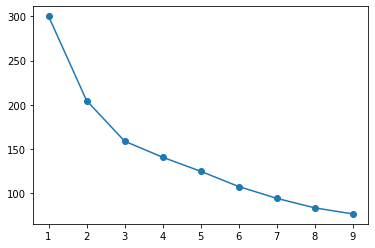

In [56]:
plt.plot(range(1,10),err1,marker = "o")
plt.show()

In [57]:
# Finding out the silhouette score for different number of clusters.
sc = []
for i in range(2,10):
    km1 = KMeans(n_clusters=i,random_state=54)
    km1.fit(ss_df)
    score = silhouette_score(ss_df,km1.labels_)
    print(f" for the {i} value we get ",round(score,4))

 for the 2 value we get  0.2684
 for the 3 value we get  0.2755
 for the 4 value we get  0.244
 for the 5 value we get  0.216
 for the 6 value we get  0.2219
 for the 7 value we get  0.2155
 for the 8 value we get  0.2218
 for the 9 value we get  0.2159


In [58]:
# we are going to run clustering algorithm for different cluster values and add it to our dataframe.

# 2 clusters
km2 = KMeans(n_clusters= 2 ,random_state=56)
km2.fit(ss_df)
neighborhood_stats["2_cluster_labels"] = km2.labels_

# 3 clusters
km2 = KMeans(n_clusters= 3 ,random_state=56)
km2.fit(ss_df)
neighborhood_stats["3_cluster_labels"] = km2.labels_

# 4 clusters
km2 = KMeans(n_clusters= 4 ,random_state=56)
km2.fit(ss_df)
neighborhood_stats["4_cluster_labels"] = km2.labels_

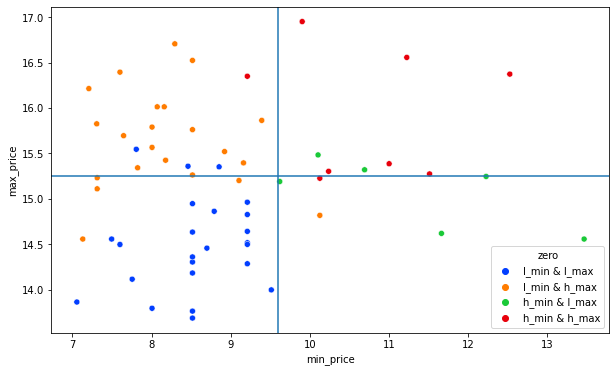

In [59]:
# creating a new column to name the clusters
neighborhood_stats['zero'] = neighborhood_stats['4_cluster_labels'].replace({0:'h_min & h_max',1:'l_min & l_max',2:'l_min & h_max',3:'h_min & l_max'})

# let's plot a scatter plot to see how well our clustering has grouped the data points

plt.figure(figsize=(10,6))
sns.scatterplot(x = neighborhood_stats['min_price'],y = neighborhood_stats['max_price'],hue = neighborhood_stats['zero'],palette='bright')
plt.axvline(9.6)
plt.axhline(15.25)
plt.show()

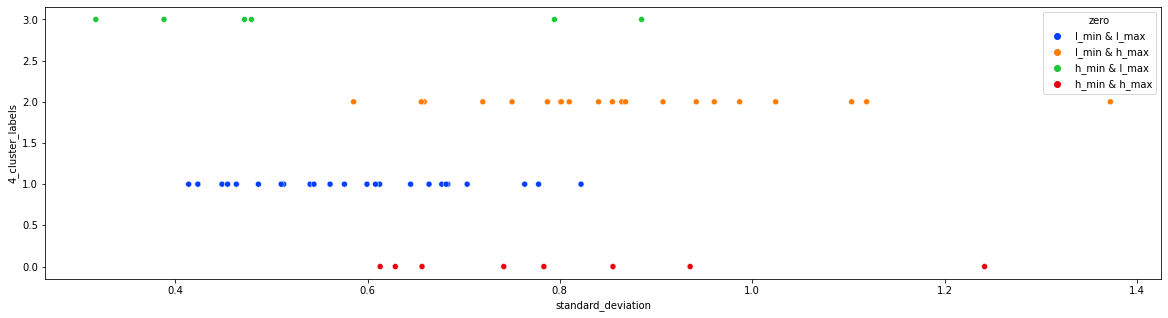

In [60]:
plt.figure(figsize=(20,5))
plt.tight_layout()
sns.scatterplot(data = neighborhood_stats,
                y = '4_cluster_labels',x= 'standard_deviation',
               hue = neighborhood_stats['zero'],palette='bright')
plt.show()

In [61]:
# inference from above clusters

'''Low minimum price and low maximum price'''
# l_min & l_max = They were low priced is the past and still they are at low price range (low deviation) 

'''Low minimum price and high maximum price'''
# l_min & h_max = They were low priced in the past but later they moved to premiium price range (good deviation) (good growth)

'''High minimum price and low maximum price '''
# h_min & l_max = They were premium priced in the past and but they did not experience any relative growth (low deviation)

'''High minimum price and high maximum price'''
# h_min & h_max = they were premium priced in the past and still they are maintaining their premium level (good deviation)

'High minimum price and high maximum price'

## For 'SchoolDist' feature:

In [62]:
# let's check the skewness in each feature in our mini dataframe.
for k in school_stats.columns[1:]:
    print(f'skewness in {k} is {round(school_stats[k].skew(),3)} ')

skewness in standard_deviation is -0.038 
skewness in mean is 0.094 
skewness in min_price is 0.337 
skewness in max_price is -0.277 
skewness in skewness is -0.226 


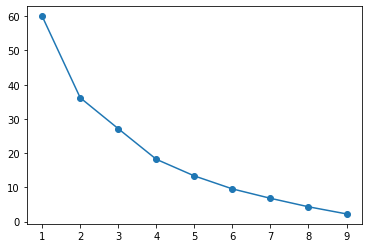

In [63]:
ss = StandardScaler()
ss_sd_df = ss.fit_transform(school_stats.iloc[:,1:])
ss_sd_df = pd.DataFrame(ss_sd_df)

err1 = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=54)
    km.fit(ss_sd_df)
    err1.append(km.inertia_)

plt.plot(range(1,10),err1,marker = "o")
plt.show()

In [64]:
sc = []
for i in range(2,10):
    km1 = KMeans(n_clusters=i,random_state=54)
    km1.fit(ss_sd_df)
    score = silhouette_score(ss_sd_df,km1.labels_)
    print(f" for the {i} value we get ",round(score,4))

 for the 2 value we get  0.2988
 for the 3 value we get  0.2759
 for the 4 value we get  0.2615
 for the 5 value we get  0.2194
 for the 6 value we get  0.2546
 for the 7 value we get  0.2386
 for the 8 value we get  0.2395
 for the 9 value we get  0.1992


In [65]:
km2 = KMeans(n_clusters= 2 ,random_state=56)
km2.fit(ss_sd_df)
school_stats["2_cluster_labels"] = km2.labels_

km2 = KMeans(n_clusters= 3 ,random_state=56)
km2.fit(ss_sd_df)
school_stats["3_cluster_labels"] = km2.labels_

km2 = KMeans(n_clusters= 4 ,random_state=56)
km2.fit(ss_sd_df)
school_stats["4_cluster_labels"] = km2.labels_

km2 = KMeans(n_clusters= 6 ,random_state=56)
km2.fit(ss_sd_df)
school_stats["6_cluster_labels"] = km2.labels_

In [66]:
school_stats

,SchoolDist,standard_deviation,mean,min_price,max_price,skewness,2_cluster_labels,3_cluster_labels,4_cluster_labels,6_cluster_labels
0,a,1.103454,13.667628,7.207860,16.372738,-1.602857,1,2,1,1
1,b,1.005050,13.633908,7.600902,16.705882,-2.142633,1,2,1,1
2,c,0.852184,13.887611,8.160518,16.951005,-1.425340,1,0,3,3
3,d,0.940668,13.042936,7.130899,15.363073,-2.083999,0,1,2,2
4,e,0.971854,13.176709,7.307202,15.825537,-2.254260,0,1,2,2
5,f,0.639898,12.801647,7.679714,14.115615,-3.368829,0,1,0,0
6,g,0.773303,12.672582,7.056175,15.246220,-2.718886,0,1,2,2
7,h,0.564925,13.547395,8.177516,15.424948,-2.774532,0,1,0,4
8,i,0.640679,13.453727,8.517193,16.523561,-1.092003,1,0,3,3
9,j,0.620781,13.195562,7.495542,15.863203,-1.963140,0,1,2,4


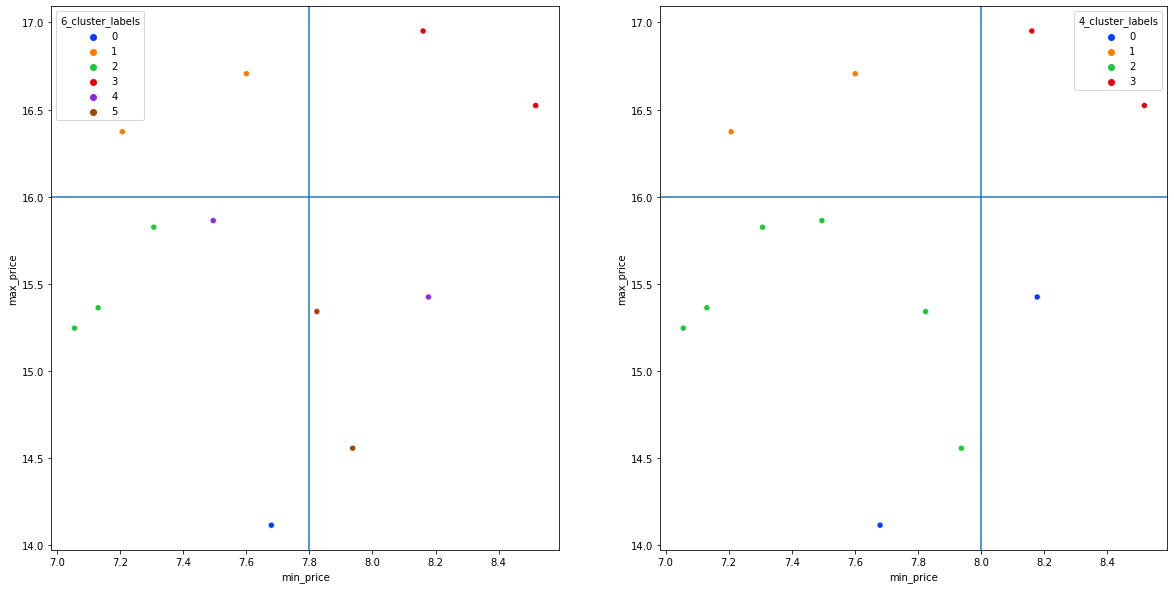

In [67]:
plt.figure(figsize=(20,10))
plt.tight_layout()
plt.subplot(1,2,1)
sns.scatterplot(x = school_stats['min_price'],y = school_stats['max_price'],
                hue = school_stats['6_cluster_labels'],palette='bright')
plt.axhline(16)
plt.axvline(7.8)

plt.subplot(1,2,2)
sns.scatterplot(x = school_stats['min_price'],y = school_stats['max_price'],
                hue = school_stats['4_cluster_labels'],palette='bright')
plt.axhline(16)
plt.axvline(8)
plt.show()

In [68]:
# from the above we can form the following groups 

# 1.) a, b
# 2.) d, e, g ,(j)
# 3.) c, i
# 4.) k,l
# 5.) f,h

# these groups were made by comparing the above dataframe and scatter plot

## For 'building_class_at_sale' feature:

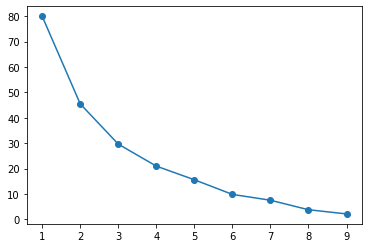

In [69]:
ss = StandardScaler()
ss_bc_df = ss.fit_transform(bclass_stats.iloc[:,1:])
ss_bc_df = pd.DataFrame(ss_bc_df)

err1 = []
for i in range(1,10):
    km = KMeans(n_clusters=i,random_state=54)
    km.fit(ss_bc_df)
    err1.append(km.inertia_)
    
plt.plot(range(1,10),err1,marker = "o")
plt.show()

In [70]:
sc = []
for i in range(2,10):
    km1 = KMeans(n_clusters=i,random_state=54)
    km1.fit(ss_bc_df)
    score = silhouette_score(ss_bc_df,km1.labels_)
    print(f" for the {i} value we get ",round(score,4))

 for the 2 value we get  0.5058
 for the 3 value we get  0.4901
 for the 4 value we get  0.3524
 for the 5 value we get  0.2638
 for the 6 value we get  0.2436
 for the 7 value we get  0.2425
 for the 8 value we get  0.2712
 for the 9 value we get  0.2812


In [71]:
km2 = KMeans(n_clusters= 2 ,random_state=54)
km2.fit(ss_bc_df)
bclass_stats["2_cluster_labels"] = km2.labels_

km2 = KMeans(n_clusters= 3 ,random_state=54)
km2.fit(ss_bc_df)
bclass_stats["3_cluster_labels"] = km2.labels_

km2 = KMeans(n_clusters= 4 ,random_state=54)
km2.fit(ss_bc_df)
bclass_stats["4_cluster_labels"] = km2.labels_

In [72]:
bclass_stats

,building_class_at_sale,standard_deviation,mean,min_price,max_price,skewness,2_cluster_labels,3_cluster_labels,4_cluster_labels
0,A0,0.531143,13.161520,12.476100,14.346139,1.678087,1,2,3
1,A1,0.756700,13.375124,7.679714,16.245609,-1.187997,0,0,1
2,A2,0.741987,12.874582,8.517193,14.827111,-1.236087,0,0,0
3,A3,0.644920,14.198084,11.652687,16.142788,0.331994,1,1,2
4,A4,1.083471,13.733353,7.892826,16.213406,-1.269867,0,0,1
5,A5,0.665585,13.079633,7.755339,16.142788,-1.221634,0,0,1
6,A7,0.995355,14.836194,12.959844,16.143763,-0.916539,1,1,2
7,A9,0.690531,13.098808,7.763021,16.556351,-1.050371,0,0,1
8,B1,0.783142,13.225271,7.056175,15.847598,-1.819171,0,0,1
9,B2,0.828595,13.142549,7.313220,15.607270,-2.189418,0,0,1


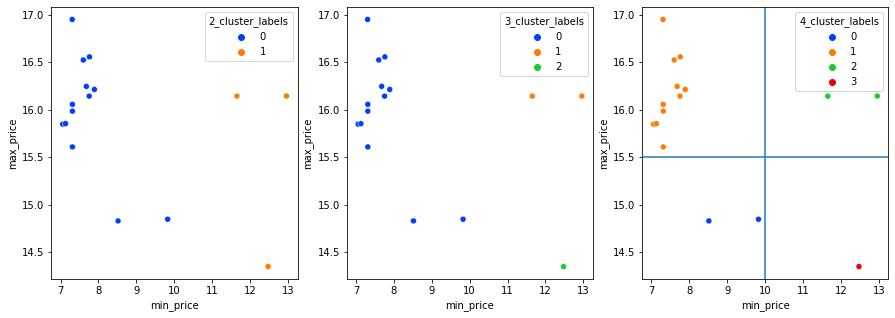

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = bclass_stats['min_price'],y = bclass_stats['max_price'],
                hue = bclass_stats['2_cluster_labels'],palette='bright')

plt.subplot(1,3,2)
sns.scatterplot(x = bclass_stats['min_price'],y = bclass_stats['max_price'],
                hue = bclass_stats['3_cluster_labels'],palette='bright')

plt.subplot(1,3,3)
sns.scatterplot(x = bclass_stats['min_price'],y = bclass_stats['max_price'],
                hue = bclass_stats['4_cluster_labels'],palette='bright')

plt.axhline(15.5)
plt.axvline(10)
plt.show()

In [74]:
# conclusion (groups)

# A0
# A7,A3
# S0,A2
# A1,A2,A3,A4,A5,A9

## For 'LandUse' feature:

In [75]:
df_copy14['LandUse'].value_counts()

One & Two Family Buildings                  42314
Multi-Family Walk-Up Buildings              10066
Mixed Residential & Commercial Buildings     2788
Multi-Family Elevator Buildings                66
Commercial & Office Buildings                  36
Public Facilities & Institutions               27
Parking Facilities                              3
Industrial & Manufacturing                      1
Name: LandUse, dtype: int64

In [76]:
# We can observe that top 3 categories share more than 95% of the data
# One & Two Family Buildings
# Multi-Family Walk-Up Buildings
# Mixed Residential & Commercial Buildings
# so we can have 4 categories, the 4th category including all other sub-categories

# LandUse - 4 groups
# 1.) One & Two Family Buildings
# 2.) Multi-Family Walk-Up Buildings
# 3.) Mixed Residential & Commercial Buildings
# 4.) other

## For 'ProxCode' feature:

In [77]:
df_copy14['ProxCode'].value_counts()

Attached         23966
Semi-attached    18192
Detached         11285
Not available     1858
Name: ProxCode, dtype: int64

In [78]:
proxy_stats

,ProxCode,standard_deviation,mean,min_price,max_price,skewness
0,Attached,0.899016,13.248281,7.056175,16.556351,-1.493572
1,Detached,0.807724,13.329433,7.313220,16.245609,-1.489876
2,Not available,0.911442,13.402932,7.307202,16.951005,-1.457521
3,Semi-attached,0.777207,13.191301,7.495542,16.523561,-2.001482


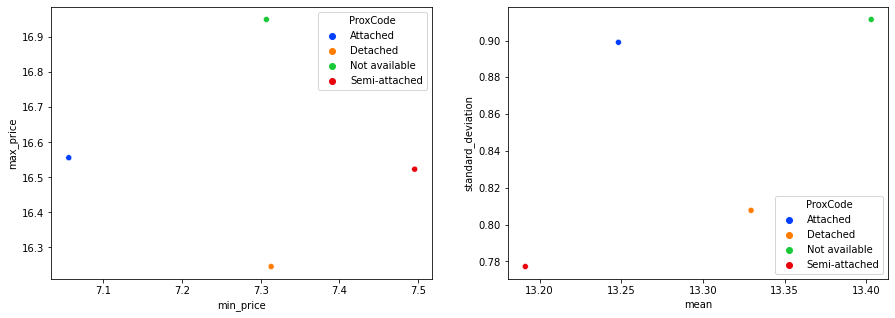

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = proxy_stats['min_price'],y = proxy_stats['max_price'],
                hue = proxy_stats['ProxCode'],palette='bright')
plt.subplot(1,2,2)
sns.scatterplot(x = proxy_stats['mean'],y = proxy_stats['standard_deviation'],
                hue = proxy_stats['ProxCode'],palette='bright')
plt.show()

In [80]:
# not much could be done with proxycode feature

## For 'LotType' feature:

In [81]:
df_copy14['LotType'].value_counts(normalize=True)

Inside             0.939513
Corner             0.052223
Interior lot       0.004503
Waterfront         0.001175
unknown            0.001157
Through            0.000976
lock assemblage    0.000307
Alley lot          0.000145
Name: LotType, dtype: float64

In [82]:
# 94% belongs to one subcategory
#we can have 3 catgegories
#top 2 and other_lots being 3rd one

# LotType - 3 groups
# inside
# corner
# other 

## For 'BsmtCode' feature:

In [83]:
df_copy14['BsmtCode'].value_counts(normalize=True)

two basements     0.583823
one basement      0.353267
no basement       0.031356
five basements    0.024629
four basements    0.005190
three basement    0.001736
Name: BsmtCode, dtype: float64

In [84]:
Bsmt_stats

,BsmtCode,standard_deviation,mean,min_price,max_price,skewness
0,five basements,0.885532,13.401073,8.517193,16.951005,-0.688943
1,four basements,0.829386,13.208273,9.210340,15.163584,-1.844817
2,no basement,0.820951,13.014380,7.495542,15.648092,-1.211493
3,one basement,0.899480,13.315842,7.130899,16.523561,-1.625297
4,three basement,1.033135,13.439747,8.122074,15.201805,-1.995187
5,two basements,0.803680,13.218462,7.056175,16.556351,-1.729074


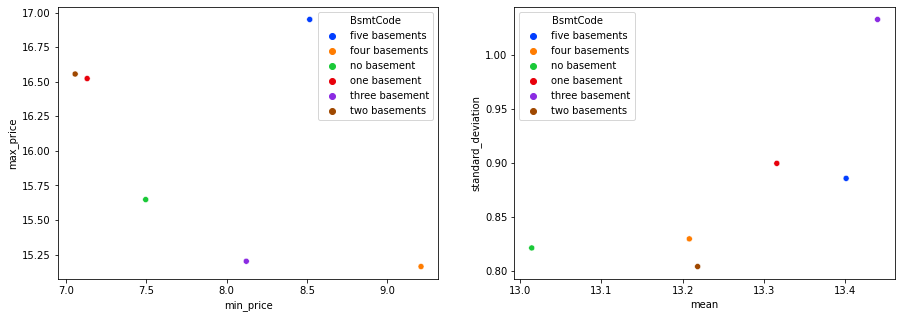

In [85]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x = Bsmt_stats['min_price'],y = Bsmt_stats['max_price'],
                hue = Bsmt_stats['BsmtCode'],palette='bright')
plt.subplot(1,2,2)
sns.scatterplot(x = Bsmt_stats['mean'],y = Bsmt_stats['standard_deviation'],
                hue = Bsmt_stats['BsmtCode'],palette='bright')
plt.show()

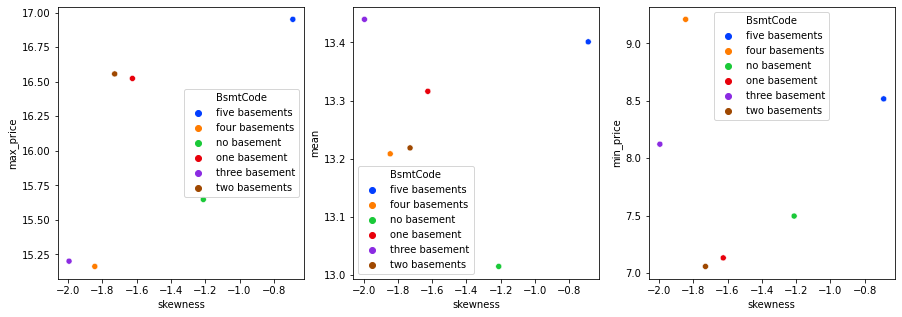

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = Bsmt_stats['skewness'],y = Bsmt_stats['max_price'],
                hue = Bsmt_stats['BsmtCode'],palette='bright')
plt.subplot(1,3,2)
sns.scatterplot(y = Bsmt_stats['mean'],x = Bsmt_stats['skewness'],
                hue = Bsmt_stats['BsmtCode'],palette='bright')
plt.subplot(1,3,3)
sns.scatterplot(x = Bsmt_stats['skewness'],y = Bsmt_stats['min_price'],
                hue = Bsmt_stats['BsmtCode'],palette='bright')
plt.show()

In [87]:
# not much could be done with BsmtCode feature

# Now let's replace all sub-categories with the clusters that we have obtained.

In [88]:
# Let us create a list of neighborhoods that belong to each cluster

'''lila - Low Minimum price and Low Maximum price
   hiha - High Minimum price and High Maximum price
   liha - Low Minimum price and High Maximum price
   hila - High Minimum price and Low Maximum price'''

lila_neigh = neighborhood_stats[neighborhood_stats['zero'] == 'l_min & l_max']['neighborhood'].values
hiha_neigh = neighborhood_stats[neighborhood_stats['zero'] == 'h_min & h_max']['neighborhood'].values
liha_neigh = neighborhood_stats[neighborhood_stats['zero'] == 'l_min & h_max']['neighborhood'].values
hila_neigh = neighborhood_stats[neighborhood_stats['zero'] == 'h_min & l_max']['neighborhood'].values

# Let us create a list of 'building_class_at_sale' that belong to each cluster
lila_bclass = bclass_stats[bclass_stats['4_cluster_labels'] == 0]['building_class_at_sale'].values
hiha_bclass = bclass_stats[bclass_stats['4_cluster_labels'] == 2]['building_class_at_sale'].values
liha_bclass = bclass_stats[bclass_stats['4_cluster_labels'] == 1]['building_class_at_sale'].values
hila_bclass = bclass_stats[bclass_stats['4_cluster_labels'] == 3]['building_class_at_sale'].values

# Creating user defined functions for mapping the clusters.

def neighbor_cluster(a):
    if a in lila_neigh:
        return('low_min_low_max_neighborhood')
    elif a in hiha_neigh:
        return('high_min_high_max_neighborhood')
    elif a in hila_neigh:
        return('high_min_low_max_neighborhood')
    elif a in liha_neigh:
        return('low_min_high_max_neighborhood')
    
def bclass_cluster(a):
    if a in lila_bclass:
        return('lila_bclass')
    elif a in hiha_bclass:
        return('hiha_bclass')
    elif a in hila_bclass:
        return('hila_bclass')
    elif a in liha_bclass:
        return('liha_bclass')
    
def landuse(a):
    if a == 'One & Two Family Buildings':
        return('One & Two Family Buildings')
    elif a == 'Multi-Family Walk-Up Buildings':
        return('Multi-Family Walk-Up Buildings')
    elif a == 'Mixed Residential & Commercial Buildings':
        return('Mixed Residential & Commercial Buildings')
    else:
        return('other use')

def school(a):
    if a in ['a','b']:
        return('Group1')
    elif a in ['d','e','g','j']:
        return('Group2')
    elif a in ['c','i']:
        return('Group3')
    elif a in ['k','l']:
        return('Group4')
    else:
        return('Group5')
    
def lot(a):
    if a == 'Inside':
        return('Inside')
    elif a == 'Corner':
        return('Corner')
    else:
        return('other_lots')

In [89]:
# mapping the clusters....

df_copy14['neighbor_clusters']=df_copy14['neighborhood'].map(neighbor_cluster)

df_copy14['bclass_clusters']=df_copy14['building_class_at_sale'].map(bclass_cluster)

df_copy14['landuse_group']=df_copy14['LandUse'].map(landuse)

df_copy14['school']=df_copy14['SchoolDist'].map(school)

df_copy14['Lot']=df_copy14['LotType'].map(lot)

In [90]:
df_copy14.head()

,neighborhood,building_class_category,land_sqft,gross_sqft,building_class_at_sale,sale_price,year_of_sale,SchoolDist,LandUse,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age,neighbor_clusters,bclass_clusters,landuse_group,school,Lot
316,BOERUM HILL,02 TWO FAMILY HOMES,7.600902,8.348775,S2,16.951005,5,c,Mixed Residential & Commercial Buildings,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,Not available,N,Inside,five basements,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside
469,GREENPOINT,02 TWO FAMILY HOMES,7.824046,8.006368,S2,16.705882,7,b,Mixed Residential & Commercial Buildings,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,Not available,N,Inside,five basements,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84,low_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group1,Inside
576,COBBLE HILL,01 ONE FAMILY HOMES,7.829233,9.210340,A9,16.556351,7,c,One & Two Family Buildings,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,Attached,N,Inside,two basements,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84,high_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group3,Inside
613,OCEAN PARKWAY-SOUTH,03 THREE FAMILY HOMES,7.377759,7.822445,C0,16.523561,7,i,Multi-Family Walk-Up Buildings,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,Semi-attached,N,Inside,one basement,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90,low_min_high_max_neighborhood,liha_bclass,Multi-Family Walk-Up Buildings,Group3,Inside
693,BOERUM HILL,02 TWO FAMILY HOMES,7.854769,8.159375,S2,16.425580,8,c,Mixed Residential & Commercial Buildings,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,Not available,Y,Inside,five basements,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside


In [91]:
df_copy15 = df_copy14.copy()

df_copy15 = df_copy15[['land_sqft','gross_sqft','year_of_sale','LotArea','BldgArea','ResArea','NumFloors','LotFront','LotDepth',
                       'BldgFront','BldgDepth','AssessLand','AssessTot','BuiltFAR','ResidFAR','FacilFAR','SHAPE_Leng',
                       'SHAPE_Area','Total_alterations','age','building_class_category','ProxCode','IrrLotCode','BsmtCode',
                       'neighbor_clusters','bclass_clusters','landuse_group','school','Lot','sale_price']]

In [92]:
df_copy15.head()

,land_sqft,gross_sqft,year_of_sale,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age,building_class_category,ProxCode,IrrLotCode,BsmtCode,neighbor_clusters,bclass_clusters,landuse_group,school,Lot,sale_price
316,7.600902,8.348775,5,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108,02 TWO FAMILY HOMES,Not available,N,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside,16.951005
469,7.824046,8.006368,7,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84,02 TWO FAMILY HOMES,Not available,N,five basements,low_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group1,Inside,16.705882
576,7.829233,9.210340,7,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84,01 ONE FAMILY HOMES,Attached,N,two basements,high_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group3,Inside,16.556351
613,7.377759,7.822445,7,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90,03 THREE FAMILY HOMES,Semi-attached,N,one basement,low_min_high_max_neighborhood,liha_bclass,Multi-Family Walk-Up Buildings,Group3,Inside,16.523561
693,7.854769,8.159375,8,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106,02 TWO FAMILY HOMES,Not available,Y,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside,16.425580


In [93]:
# let's create a user defined function to check how different features correlate to target feature.

def scatter(a):
    plt.figure(figsize=(15,18))
    plt.tight_layout()
    plt.subplot(3,3,1)
    plt.title('8')
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 8)&
                                     (df_copy15['neighbor_clusters'] == 'low_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,2)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 8)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,3)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 8)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_low_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,4)
    plt.title('5')
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 5)&
                                     (df_copy15['neighbor_clusters'] == 'low_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,5)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 5)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,6)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 5)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_low_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')

    plt.subplot(3,3,7)
    plt.title('6')
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 6)&
                                     (df_copy15['neighbor_clusters'] == 'low_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,8)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 6)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_high_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.subplot(3,3,9)
    sns.scatterplot(data = df_copy15[(df_copy15['year_of_sale'] == 6)&
                                     (df_copy15['neighbor_clusters'] == 'high_min_low_max_neighborhood')
                                    & (df_copy15['school'] == 'Group3')&(df_copy15['BsmtCode'] == 'two basements')],
                    x = a,y = 'sale_price')
    plt.show()

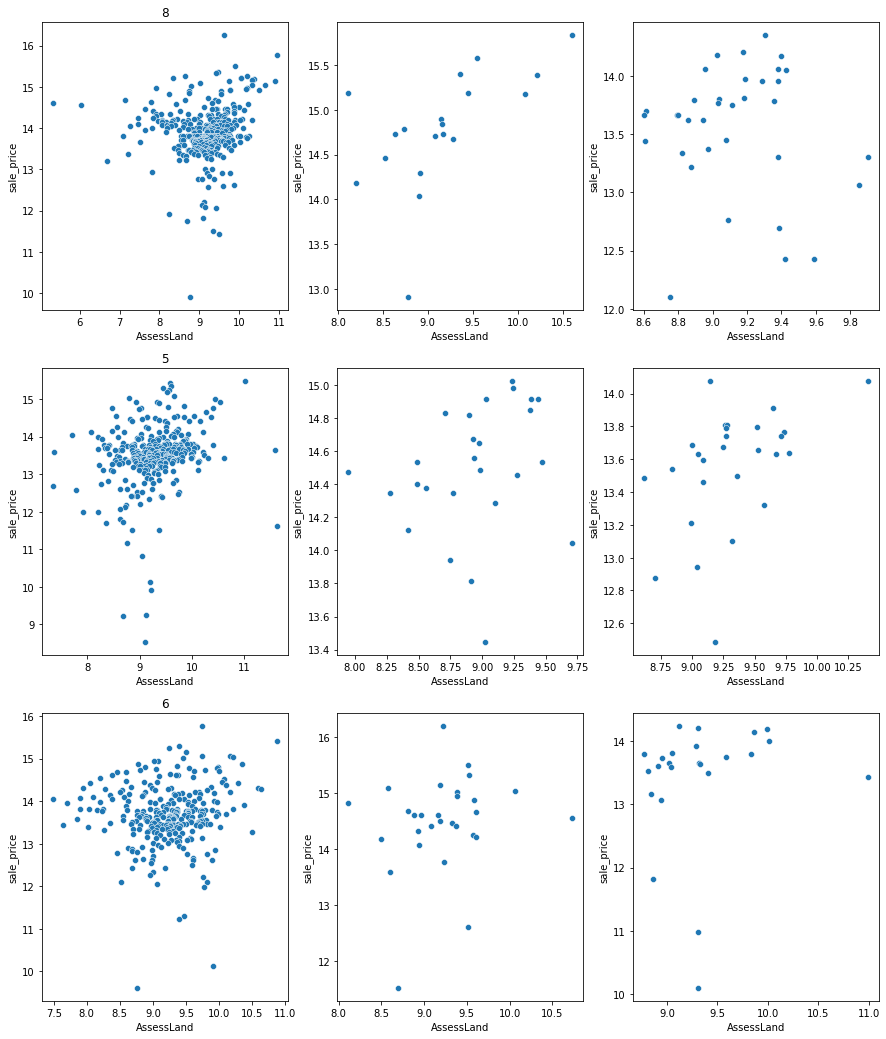

In [94]:
scatter('AssessLand')

In [95]:
# observation:
# 1st column is 'low_min_high_max_neighborhood'
'''Here we can see that the data points are clustered around a region'''
# 2nd column is 'high_min_high_max_neighborhood'
'''here a regression is clearly visible but the data points are spread out'''
# 3rd column is 'high_min_low_max_neighborhood'
'''here also a possibility of regression is visible'''

'''actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters
move over the years'''

'actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters\nmove over the years'

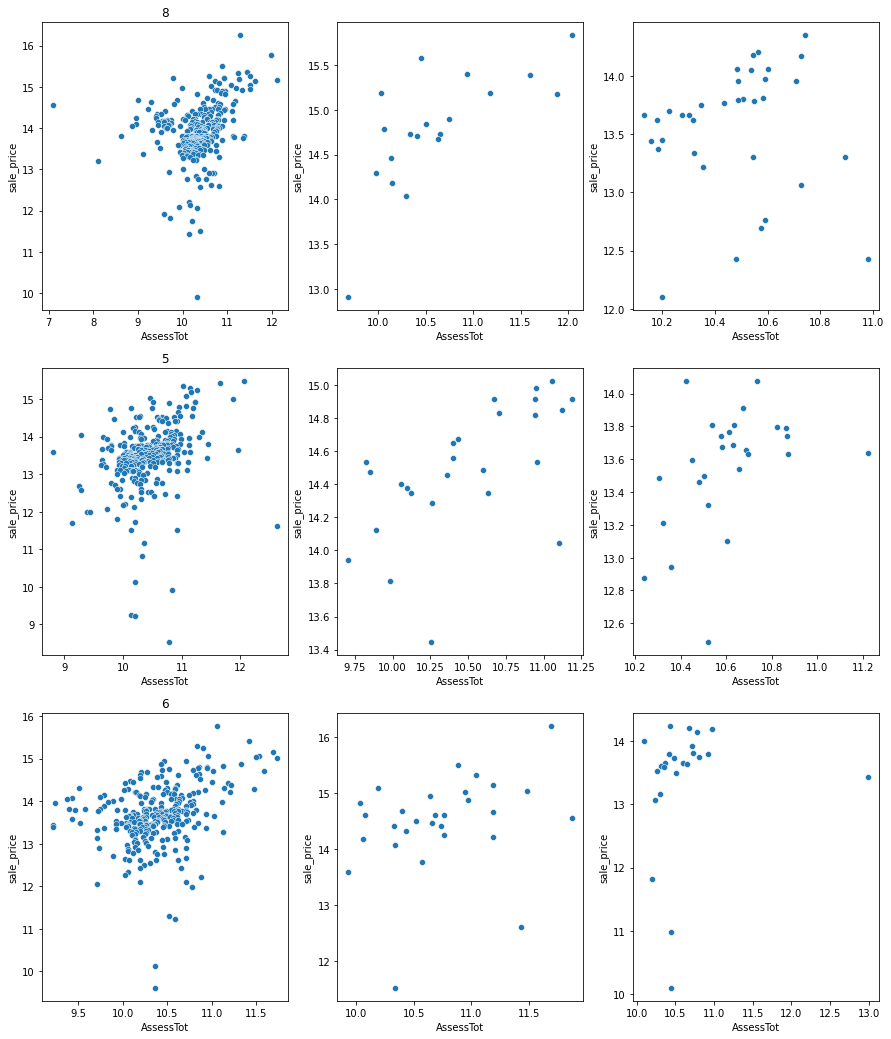

In [96]:
scatter('AssessTot')

In [97]:
# observation:
# 1st column is 'low_min_high_max_neighborhood'
'''Here we can see that the data points are clustered around a region'''
# 2nd column is 'high_min_high_max_neighborhood'
'''here a regression is clearly visible but the data points are spread out'''
# 3rd column is 'high_min_low_max_neighborhood'
'''here also a possibility of regression is visible'''

'''actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters
move over the years'''

'actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters\nmove over the years'

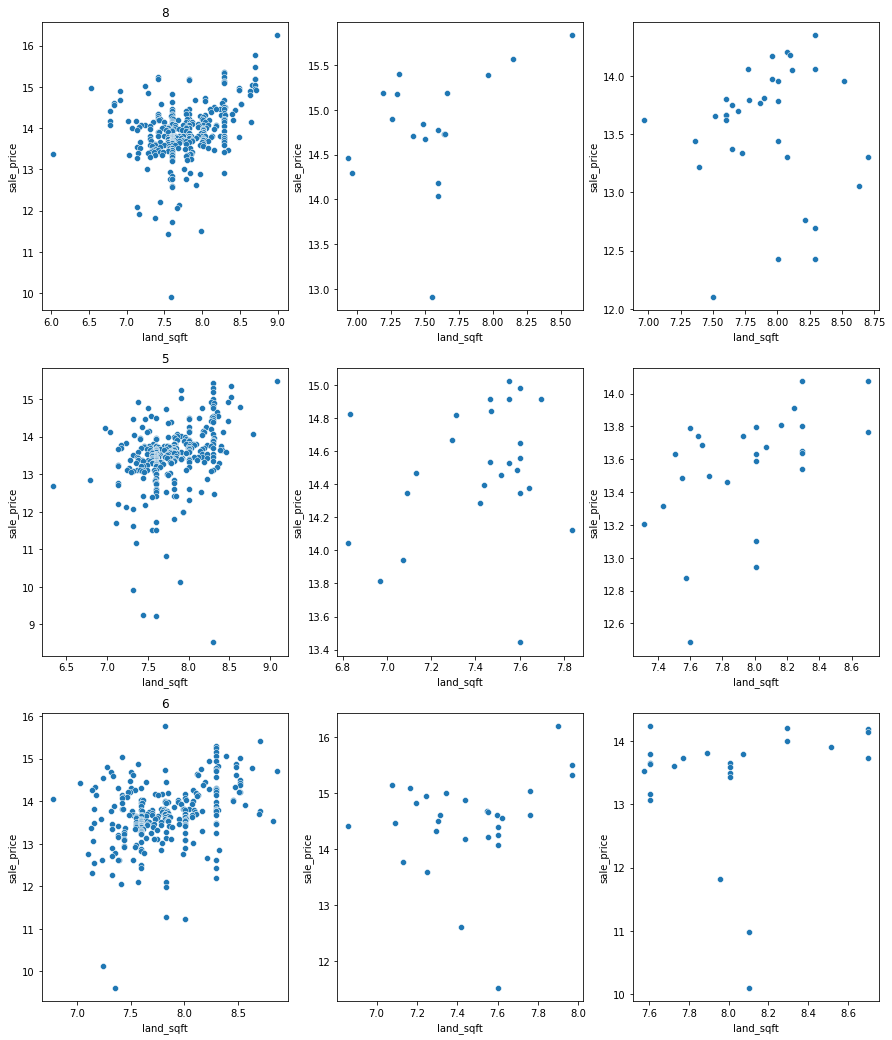

In [98]:
scatter('land_sqft')

In [99]:
# observation:
# 1st column is 'low_min_high_max_neighborhood'
'''Here we can see that the data points are clustered around a region'''
# 2nd column is 'high_min_high_max_neighborhood'
'''here a regression is clearly visible but the data points are spread out'''
# 3rd column is 'high_min_low_max_neighborhood'
'''here also a possibility of regression is visible'''

'''actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters
move over the years'''

'actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters\nmove over the years'

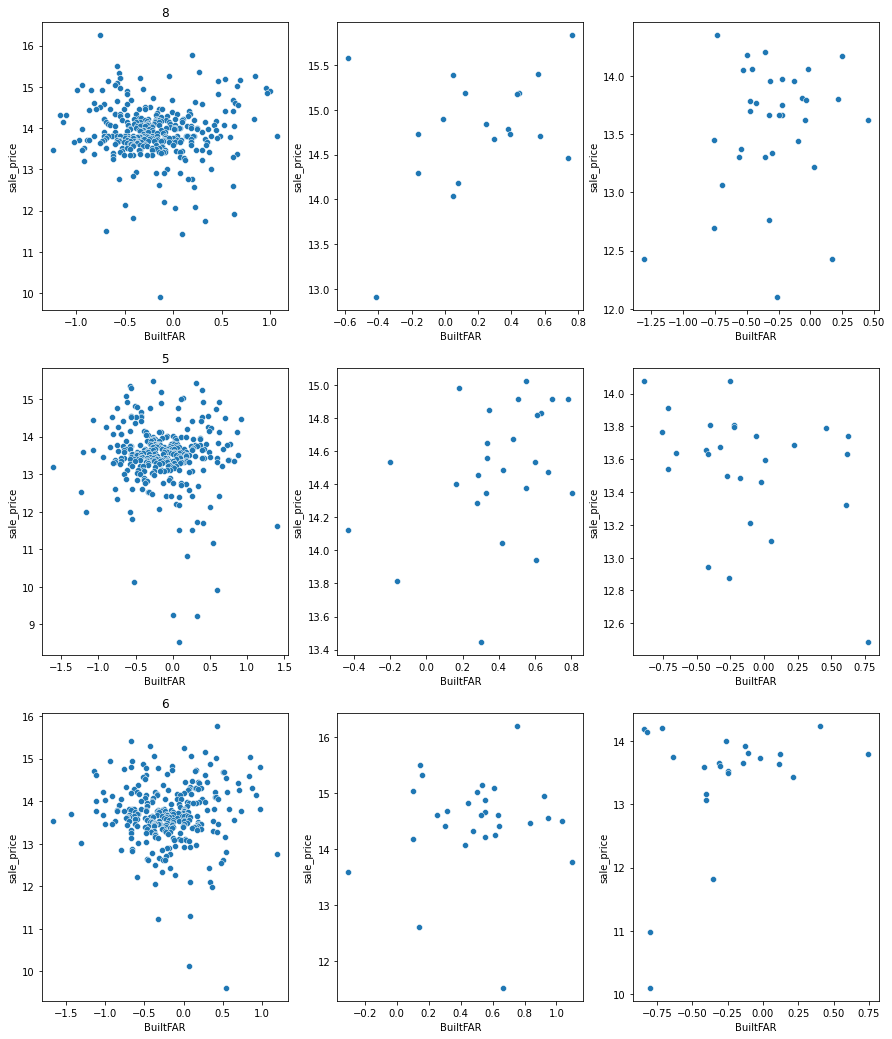

In [100]:
scatter('BuiltFAR')

In [101]:
# observation:
# 1st column is 'low_min_high_max_neighborhood'
'''Here we can see that the data points are clustered around a region'''
# 2nd column is 'high_min_high_max_neighborhood'
'''here a regression is clearly visible but the data points are spread out'''
# 3rd column is 'high_min_low_max_neighborhood'
'''here also a possibility of regression is visible'''

'''actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters
move over the years'''

'actually we can the low min and high max neighborhood and plot the above scatter plot for all years to check how the clusters\nmove over the years'

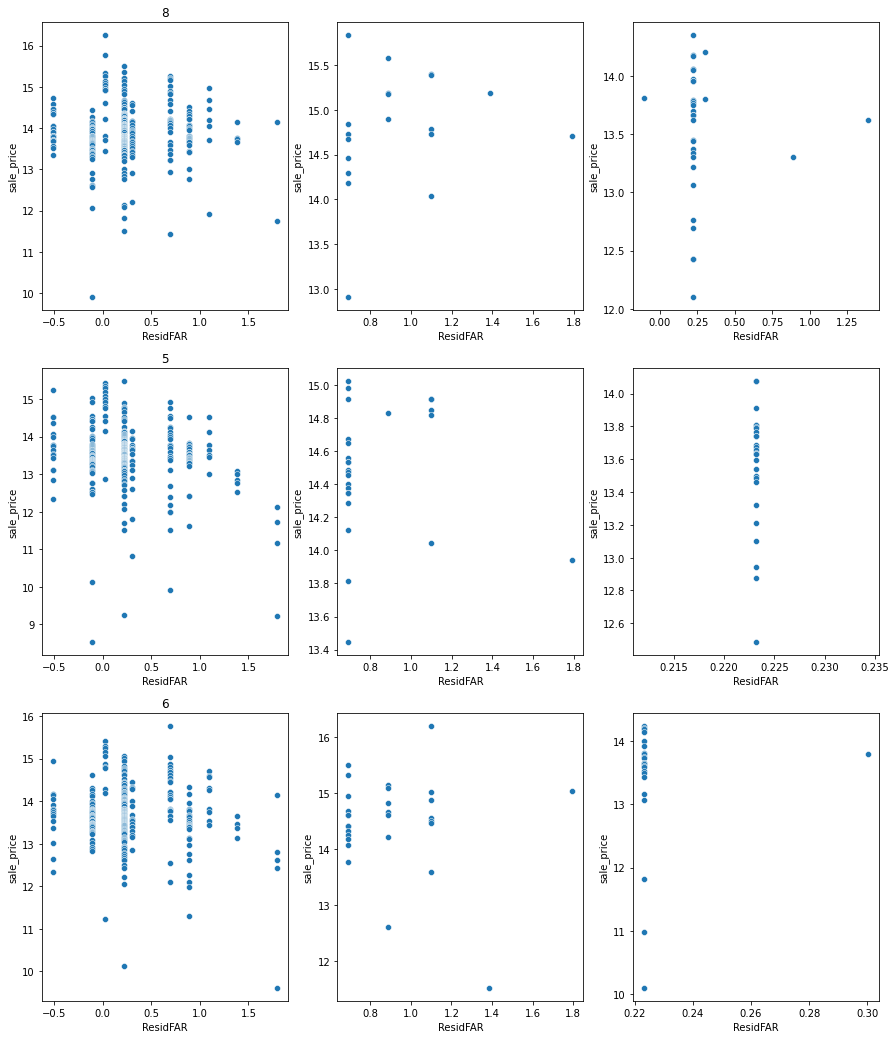

In [102]:
scatter('ResidFAR')

In [103]:
# from the above plots we can conclude that ResidFAR behaves like a categorical feature

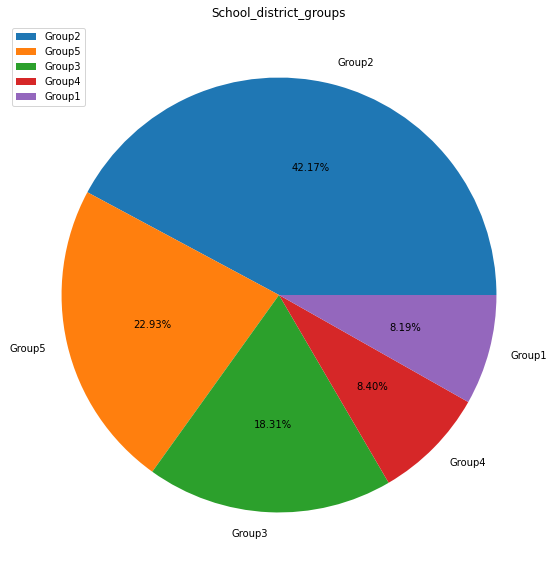

In [104]:
plt.figure(figsize=(10,10))
plt.pie(x = df_copy15['school'].value_counts().values,labels=df_copy15['school'].value_counts().index,autopct='%1.2f%%')
plt.legend()
plt.title('School_district_groups')
plt.show()

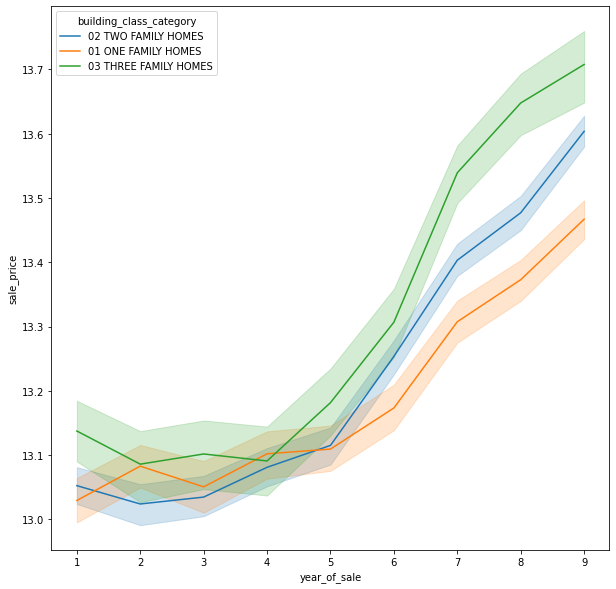

In [105]:
plt.figure(figsize=(10,10))
sns.lineplot(x = df_copy15['year_of_sale'],y = df_copy15['sale_price'],hue= df_copy15['building_class_category'])
plt.show()

In [106]:
dd = (df_copy15.groupby('year_of_sale')['sale_price'].mean()).reset_index()

In [107]:
dd

,year_of_sale,sale_price
0,1,13.061041
1,2,13.052499
2,3,13.050807
3,4,13.088630
4,5,13.125962
5,6,13.241217
6,7,13.398294
7,8,13.472483
8,9,13.574563


<Figure size 1080x432 with 0 Axes>

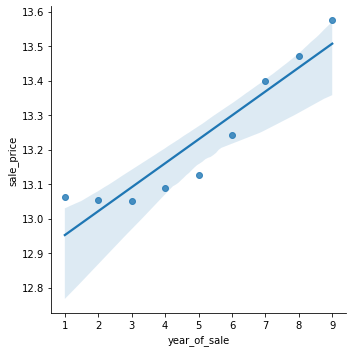

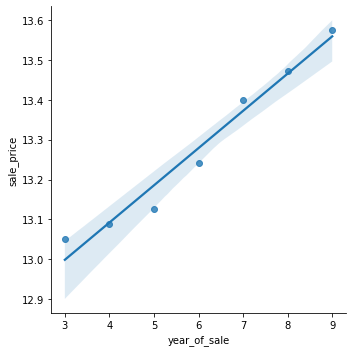

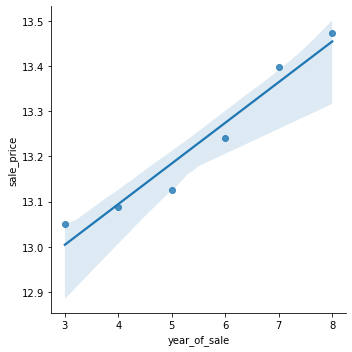

In [108]:
plt.figure(figsize=(15,6))
#plt.subplot(1,3,1)
sns.lmplot(data = dd ,x= 'year_of_sale',y ='sale_price')
#plt.subplot(1,3,2)
sns.lmplot(data = dd[dd['year_of_sale']>2] ,x= 'year_of_sale',y ='sale_price')

#plt.subplot(1,3,3)
sns.lmplot(data = dd[(dd['year_of_sale']>2)&(dd['year_of_sale']<9)] ,x= 'year_of_sale',y ='sale_price')
plt.show()

In [109]:
# from the above plots we can observe that the average price of propeties is steadily increasing from year number 3.
# until year 3 there was not much change in average price of the properties.

In [110]:
dd1 = (df_copy15.groupby(['year_of_sale','school'])['sale_price'].mean()).reset_index()

In [111]:
school_list = ['Group1','Group2','Group3','Group4','Group5']

for group in school_list:
    print(f'{group} mean =  ',round(dd1[dd1['school'] == group]['sale_price'].mean(),4))

Group1 mean =   13.6328
Group2 mean =   13.0219
Group3 mean =   13.6211
Group4 mean =   12.8962
Group5 mean =   13.2767


In [112]:
'''we can observe that certain school_district groups have experienced good average increase in sale_price compared to other
groups'''

'we can observe that certain school_district groups have experienced good average increase in sale_price compared to other\ngroups'

In [113]:
df_copy15.head()

,land_sqft,gross_sqft,year_of_sale,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age,building_class_category,ProxCode,IrrLotCode,BsmtCode,neighbor_clusters,bclass_clusters,landuse_group,school,Lot,sale_price
316,7.600902,8.348775,5,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108,02 TWO FAMILY HOMES,Not available,N,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside,16.951005
469,7.824046,8.006368,7,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84,02 TWO FAMILY HOMES,Not available,N,five basements,low_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group1,Inside,16.705882
576,7.829233,9.210340,7,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84,01 ONE FAMILY HOMES,Attached,N,two basements,high_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group3,Inside,16.556351
613,7.377759,7.822445,7,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90,03 THREE FAMILY HOMES,Semi-attached,N,one basement,low_min_high_max_neighborhood,liha_bclass,Multi-Family Walk-Up Buildings,Group3,Inside,16.523561
693,7.854769,8.159375,8,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106,02 TWO FAMILY HOMES,Not available,Y,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside,16.425580


In [114]:
df_copy15.select_dtypes(object)

,building_class_category,ProxCode,IrrLotCode,BsmtCode,neighbor_clusters,bclass_clusters,landuse_group,school,Lot
316,02 TWO FAMILY HOMES,Not available,N,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside
469,02 TWO FAMILY HOMES,Not available,N,five basements,low_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group1,Inside
576,01 ONE FAMILY HOMES,Attached,N,two basements,high_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group3,Inside
613,03 THREE FAMILY HOMES,Semi-attached,N,one basement,low_min_high_max_neighborhood,liha_bclass,Multi-Family Walk-Up Buildings,Group3,Inside
693,02 TWO FAMILY HOMES,Not available,Y,five basements,high_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group3,Inside
...,...,...,...,...,...,...,...,...,...
179105,02 TWO FAMILY HOMES,Detached,N,two basements,low_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group2,Inside
179108,02 TWO FAMILY HOMES,Not available,N,two basements,low_min_high_max_neighborhood,liha_bclass,Mixed Residential & Commercial Buildings,Group2,Inside
179109,02 TWO FAMILY HOMES,Attached,N,one basement,low_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group1,Inside
179113,02 TWO FAMILY HOMES,Attached,N,one basement,low_min_high_max_neighborhood,liha_bclass,One & Two Family Buildings,Group2,Inside


In [115]:
df_copy15.select_dtypes(np.number)

,land_sqft,gross_sqft,year_of_sale,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age,sale_price
316,7.600902,8.348775,5,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108,16.951005
469,7.824046,8.006368,7,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84,16.705882
576,7.829233,9.210340,7,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84,16.556351
613,7.377759,7.822445,7,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90,16.523561
693,7.854769,8.159375,8,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106,16.425580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179105,7.824046,7.379008,6,7.824046,7.379008,7.379008,2.0,3.218876,4.605170,3.044522,3.401197,8.071531,8.909370,-0.446287,0.300105,0.693147,5.525814,7.829487,0,104,7.313220
179108,7.377759,8.101678,4,7.377759,8.101678,7.701200,3.0,2.995732,4.382027,2.995732,4.007333,8.872207,10.033814,0.722706,-0.105361,0.693147,5.324047,7.398814,0,87,7.307202
179109,7.600902,8.188689,6,7.600902,8.188689,7.901007,3.0,2.995732,4.605170,2.995732,3.806662,8.371011,10.156345,0.587787,0.693147,0.693147,5.490126,7.582815,0,115,7.207860
179113,7.600902,8.188689,3,7.600902,8.188689,7.901007,3.0,2.995732,4.605170,2.995732,3.806662,8.707318,9.958875,0.587787,0.300105,0.693147,5.515540,7.642650,0,112,7.130899


In [116]:
# now let's prepare the data for ML model development

prep_data = pd.get_dummies(data = df_copy15,drop_first=True)

In [117]:
x_train = prep_data[prep_data['year_of_sale'] != 9].drop(columns='sale_price')
y_train = prep_data[prep_data['year_of_sale'] != 9]['sale_price']
x_test =  prep_data[prep_data['year_of_sale'] == 9].drop(columns='sale_price')
y_test = prep_data[prep_data['year_of_sale'] == 9]['sale_price']

# BASE MODEL

In [118]:
import statsmodels.api as sm
X = sm.add_constant(x_train)
ols_model = sm.OLS(y_train,X).fit()

In [119]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     447.0
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:35   Log-Likelihood:                -51799.
No. Observations:               48491   AIC:                         1.037e+05
Df Residuals:                   48444   BIC:                         1.041e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               6.7869      0.206     33.019      0.000       6.384       7.190
land_sqft                                           0.1475      0.075      1.969      0.049       0.001       0.294
gross_sqft                                          0.1994      0.018     10.911      0.000       0.164       0.235
year_of_sale                                        0.0708      0.001     49.099      0.000       0.068       0.074
LotArea                                            -0.8187      0.908     -0.902      0.367      -2.599       0.961
BldgArea                                            0.7828      0.904      0.866      0.387      -0.989       2.555
ResArea                                             0.0933      0.034      2.741      0.006       0.027       0.160
NumFloors                                           0.0355      0.011      3.325      0.001       0.015       0.056
LotFront                                           -0.0559      0.044     -1.276      0.202      -0.142       0.030
LotDepth                                            0.0009      0.051      0.018      0.986      -0.099       0.100
BldgFront                                          -0.0097      0.032     -0.309      0.757      -0.072       0.052
BldgDepth                                          -0.0149      0.022     -0.686      0.492      -0.057       0.028
AssessLand                                         -0.2510      0.010    -24.128      0.000      -0.271      -0.231
AssessTot                                           0.6644      0.013     50.917      0.000       0.639       0.690
BuiltFAR                                           -0.8728      0.903     -0.966      0.334      -2.644       0.898
ResidFAR                                            0.1650      0.016     10.592      0.000       0.134       0.196
FacilFAR                                           -0.2147      0.015    -14.105      0.000      -0.245      -0.185
SHAPE_Leng                                         -0.2590      0.087     -2.976      0.003      -0.430      -0.088
SHAPE_Area                                          0.1675      0.057      2.956      0.003       0.056       0.279
Total_alterations                                  -0.0320      0.009     -3.535      0.000      -0.050      -0.014
age                                                 0.0026      0.000     19.271      0.000       0.002       0.003
building_class_category_02 TWO FAMILY HOMES        -0.0899      0.009     -9.959      0.000      -0.108      -0.072
building_class_category_03 THREE FAMILY HOMES       0.0663      0.028      2.403      0.016       0.012       0.120
ProxCode_Detached                                  -0.0380      0.0

In [120]:
pval_tab = ols_model.pvalues.reset_index().rename(columns={'index':'features',0:'p_values'})

In [121]:
pval_tab[pval_tab['p_values']<0.05].sort_values('p_values')

,features,p_values
3,year_of_sale,0.000000e+00
13,AssessTot,0.000000e+00
0,const,1.831946e-236
34,neighbor_clusters_low_min_low_max_neighborhood,6.705664e-227
33,neighbor_clusters_low_min_high_max_neighborhood,2.962708e-180
12,AssessLand,7.252491e-128
32,neighbor_clusters_high_min_low_max_neighborhood,9.439792e-110
20,age,1.907956e-82
41,school_Group2,9.268913e-68
16,FacilFAR,4.319926e-45


In [122]:
# Important features interms of pvalues 

In [123]:
pval_tab[pval_tab['p_values']>0.05]

,features,p_values
4,LotArea,0.367314
5,BldgArea,0.386531
8,LotFront,0.201958
9,LotDepth,0.985895
10,BldgFront,0.757280
11,BldgDepth,0.492472
14,BuiltFAR,0.334025
24,ProxCode_Not available,0.943113
26,IrrLotCode_Y,0.470590
29,BsmtCode_one basement,0.451073


In [124]:
# based on pvalues the above features can be omitted.

'''Now lets again build a ols model with selected features'''

'Now lets again build a ols model with selected features'

In [125]:
ols_features = pval_tab[pval_tab['p_values']>0.05].sort_values('p_values')['features'].values

In [126]:
ols_x_train = x_train.drop(columns=ols_features)
ols_x_test =  x_test.drop(columns=ols_features)
ols_X = sm.add_constant(ols_x_train)

In [127]:
ols_model_2 = sm.OLS(y_train,ols_X).fit()

In [128]:
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     662.6
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:35   Log-Likelihood:                -51808.
No. Observations:               48491   AIC:                         1.037e+05
Df Residuals:                   48459   BIC:                         1.040e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               6.5392      0.169     38.674      0.000       6.208       6.871
land_sqft                                           0.1617      0.039      4.111      0.000       0.085       0.239
gross_sqft                                          0.1777      0.016     11.357      0.000       0.147       0.208
year_of_sale                                        0.0707      0.001     49.116      0.000       0.068       0.074
ResArea                                             0.0239      0.018      1.303      0.193      -0.012       0.060
NumFloors                                           0.0413      0.009      4.746      0.000       0.024       0.058
AssessLand                                         -0.2498      0.010    -24.175      0.000      -0.270      -0.230
AssessTot                                           0.6600      0.013     51.041      0.000       0.635       0.685
ResidFAR                                            0.1629      0.015     10.527      0.000       0.133       0.193
FacilFAR                                           -0.2139      0.015    -14.071      0.000      -0.244      -0.184
SHAPE_Leng                                         -0.1606      0.045     -3.571      0.000      -0.249      -0.072
SHAPE_Area                                          0.1283      0.043      2.988      0.003       0.044       0.212
Total_alterations                                  -0.0337      0.009     -3.746      0.000      -0.051      -0.016
age                                                 0.0026      0.000     19.510      0.000       0.002       0.003
building_class_category_02 TWO FAMILY HOMES        -0.0933      0.009    -10.496      0.000      -0.111      -0.076
building_class_category_03 THREE FAMILY HOMES       0.0666      0.027      2.430      0.015       0.013       0.120
ProxCode_Detached                                  -0.0373      0.013     -2.959      0.003      -0.062      -0.013
ProxCode_Semi-attached                             -0.0383      0.008     -4.726      0.000      -0.054      -0.022
BsmtCode_four basements                            -0.0755      0.045     -1.660      0.097      -0.165       0.014
BsmtCode_no basement                               -0.1002      0.020     -4.979      0.000      -0.140      -0.061
BsmtCode_two basements                             -0.0315      0.008     -3.963      0.000      -0.047      -0.016
neighbor_clusters_high_min_low_max_neighborhood    -0.5673      0.025    -22.328      0.000      -0.617      -0.518
neighbor_clusters_low_min_high_max_neighborhood    -0.6207      0.021    -28.905      0.000      -0.663      -0.579
neighbor_clusters_low_min_low_max_neighborhood     -0.7309      0.0

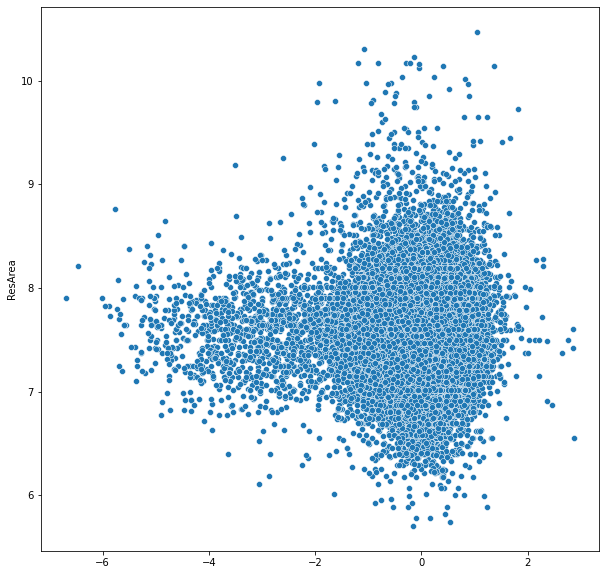

In [129]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = ols_model_2.resid,y = ols_x_train['ResArea'])
plt.show()

In [130]:
# Now let's build a model considering the year_of_sale from 3 to 8.

In [131]:
x_train = prep_data[(prep_data['year_of_sale'] != 9)&(prep_data['year_of_sale'] != 1)&
                    (prep_data['year_of_sale'] != 2)].drop(columns='sale_price')
y_train = prep_data[(prep_data['year_of_sale'] != 9)&(prep_data['year_of_sale'] != 1)&
                    (prep_data['year_of_sale'] != 2)]['sale_price']
x_test =  prep_data[(prep_data['year_of_sale'] != 9)&(prep_data['year_of_sale'] != 1)&
                    (prep_data['year_of_sale'] != 2)].drop(columns='sale_price')
y_test = prep_data[(prep_data['year_of_sale'] != 9)&(prep_data['year_of_sale'] != 1)&
                    (prep_data['year_of_sale'] != 2)]['sale_price']

In [132]:
X = sm.add_constant(x_train)
ols_model = sm.OLS(y_train,X).fit()

In [133]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     385.8
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:36   Log-Likelihood:                -41466.
No. Observations:               38578   AIC:                         8.303e+04
Df Residuals:                   38531   BIC:                         8.343e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               6.1869      0.230     26.854      0.000       5.735       6.638
land_sqft                                           0.1810      0.083      2.176      0.030       0.018       0.344
gross_sqft                                          0.2247      0.022     10.362      0.000       0.182       0.267
year_of_sale                                        0.1065      0.002     48.522      0.000       0.102       0.111
LotArea                                            -1.0904      1.018     -1.071      0.284      -3.087       0.906
BldgArea                                            1.0111      1.013      0.998      0.318      -0.975       2.997
ResArea                                             0.1094      0.038      2.850      0.004       0.034       0.185
NumFloors                                           0.0308      0.012      2.571      0.010       0.007       0.054
LotFront                                           -0.1208      0.049     -2.470      0.014      -0.217      -0.025
LotDepth                                           -0.0206      0.055     -0.371      0.710      -0.129       0.088
BldgFront                                           0.0250      0.036      0.687      0.492      -0.046       0.097
BldgDepth                                          -0.0134      0.025     -0.540      0.589      -0.062       0.035
AssessLand                                         -0.2779      0.012    -23.534      0.000      -0.301      -0.255
AssessTot                                           0.7070      0.015     48.156      0.000       0.678       0.736
BuiltFAR                                           -1.1349      1.013     -1.120      0.263      -3.121       0.851
ResidFAR                                            0.1946      0.018     11.094      0.000       0.160       0.229
FacilFAR                                           -0.2199      0.017    -12.798      0.000      -0.254      -0.186
SHAPE_Leng                                         -0.3089      0.097     -3.196      0.001      -0.498      -0.119
SHAPE_Area                                          0.2146      0.063      3.390      0.001       0.091       0.339
Total_alterations                                  -0.0194      0.010     -1.878      0.060      -0.040       0.001
age                                                 0.0033      0.000     21.247      0.000       0.003       0.004
building_class_category_02 TWO FAMILY HOMES        -0.0894      0.010     -8.748      0.000      -0.109      -0.069
building_class_category_03 THREE FAMILY HOMES       0.0917      0.032      2.892      0.004       0.030       0.154
ProxCode_Detached                                  -0.0219      0.0

In [134]:
pval_tab = ols_model.pvalues.reset_index().rename(columns={'index':'features',0:'p_values'})

In [135]:
pval_tab[pval_tab['p_values']>0.05]

,features,p_values
4,LotArea,0.284346
5,BldgArea,0.318451
9,LotDepth,0.710410
10,BldgFront,0.492356
11,BldgDepth,0.589462
14,BuiltFAR,0.262592
19,Total_alterations,0.060379
23,ProxCode_Detached,0.143007
24,ProxCode_Not available,0.963632
26,IrrLotCode_Y,0.468191


In [136]:
ols_invaild_features = pval_tab[pval_tab['p_values']>0.05].sort_values('p_values')['features'].values
ols_x_train = x_train.drop(columns=ols_invaild_features)
ols_x_test =  x_test.drop(columns=ols_invaild_features)
ols_X = sm.add_constant(ols_x_train)
ols_model_2 = sm.OLS(y_train,ols_X).fit()

In [137]:
ols_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     610.8
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:36   Log-Likelihood:                -41480.
No. Observations:               38578   AIC:                         8.302e+04
Df Residuals:                   38548   BIC:                         8.328e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               6.1466      0.210     29.220      0.000       5.734       6.559
land_sqft                                           0.1930      0.046      4.178      0.000       0.102       0.283
gross_sqft                                          0.2010      0.018     11.120      0.000       0.166       0.236
year_of_sale                                        0.1069      0.002     48.829      0.000       0.103       0.111
ResArea                                             0.0180      0.021      0.863      0.388      -0.023       0.059
NumFloors                                           0.0343      0.010      3.540      0.000       0.015       0.053
LotFront                                           -0.0925      0.036     -2.537      0.011      -0.164      -0.021
AssessLand                                         -0.2763      0.012    -23.518      0.000      -0.299      -0.253
AssessTot                                           0.6994      0.014     48.389      0.000       0.671       0.728
ResidFAR                                            0.1961      0.017     11.344      0.000       0.162       0.230
FacilFAR                                           -0.2193      0.017    -12.807      0.000      -0.253      -0.186
SHAPE_Leng                                         -0.2992      0.081     -3.713      0.000      -0.457      -0.141
SHAPE_Area                                          0.2083      0.058      3.584      0.000       0.094       0.322
age                                                 0.0032      0.000     21.396      0.000       0.003       0.003
building_class_category_02 TWO FAMILY HOMES        -0.0908      0.010     -9.074      0.000      -0.110      -0.071
building_class_category_03 THREE FAMILY HOMES       0.0964      0.031      3.075      0.002       0.035       0.158
ProxCode_Semi-attached                             -0.0256      0.008     -3.223      0.001      -0.041      -0.010
BsmtCode_no basement                               -0.0685      0.023     -2.970      0.003      -0.114      -0.023
BsmtCode_two basements                             -0.0373      0.009     -4.196      0.000      -0.055      -0.020
neighbor_clusters_high_min_low_max_neighborhood    -0.5675      0.029    -19.633      0.000      -0.624      -0.511
neighbor_clusters_low_min_high_max_neighborhood    -0.6242      0.024    -25.773      0.000      -0.672      -0.577
neighbor_clusters_low_min_low_max_neighborhood     -0.7545      0.025    -29.717      0.000      -0.804      -0.705
bclass_clusters_liha_bclass                        -0.2898      0.054     -5.345      0.000      -0.396      -0.184
bclass_clusters_lila_bclass                        -0.4479      0.0

In [138]:
# inference

'''All features except ResArea have a pvalue lesser than 0.05'''
'''So all features except ResArea are valid for model building'''
# now let's check the multicollinearity between numerical features

'So all features except ResArea are valid for model building'

In [139]:
pval_tab2 = ols_model_2.pvalues.reset_index().rename(columns={'index':'features',0:'p_values'})

In [140]:
numericals = pval_tab2['features'].values[1:14]

In [141]:
num_cols = df_copy15[numericals] 

In [142]:
num_cols.head()

,land_sqft,gross_sqft,year_of_sale,ResArea,NumFloors,LotFront,AssessLand,AssessTot,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,age
316,7.600902,8.348775,5,7.718685,3.0,3.218876,8.645586,10.490441,1.386294,1.386294,5.404267,7.623384,108
469,7.824046,8.006368,7,7.600902,3.0,3.218876,9.170143,10.505177,1.386294,1.386294,5.528171,7.820403,84
576,7.829233,9.210340,7,8.922658,3.0,3.218876,10.489133,11.524103,0.887891,1.568616,5.548480,7.924922,84
613,7.377759,7.822445,7,7.416980,2.0,2.995732,8.468843,10.269969,-0.105361,0.693147,5.325469,7.468871,90
693,7.854769,8.159375,8,7.758761,3.0,3.228826,9.851194,11.055641,1.098612,1.098612,5.576002,7.888821,106


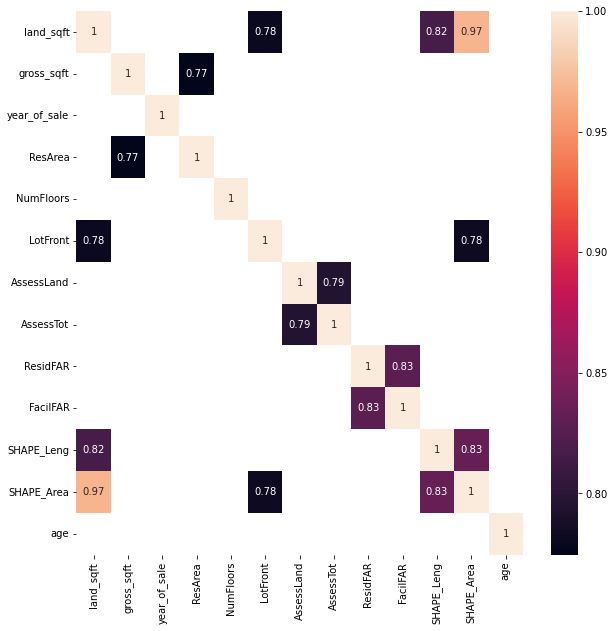

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(num_cols.corr()[num_cols.corr() >0.7],annot=True)
plt.show()

## inference
 we could see that 'land_sqft' is higly correlated to SHAPE_Area and SHAPE_Leng
 
 Also ResidFAR is highly correlated to FacilFAR
 
 SAHPE_Leng is highly correlated to SHAPE_Area

In [144]:
# Let us calculate Variance inflation factor for the numerical features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating a dataframe to store the values
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,13104.515167,SHAPE_Area
1,9853.408315,land_sqft
2,6707.432211,SHAPE_Leng
3,1625.800318,ResArea
4,1224.366078,AssessTot
5,1074.285287,gross_sqft
6,767.935671,LotFront
7,726.783848,AssessLand
8,34.757881,NumFloors
9,14.961045,FacilFAR


In [145]:
num_cols.drop(columns = 'SHAPE_Area',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,6542.561403,land_sqft
1,4680.315839,SHAPE_Leng
2,1616.219853,ResArea
3,1212.415440,AssessTot
4,1065.706611,gross_sqft
5,724.282440,AssessLand
6,573.386694,LotFront
7,34.754281,NumFloors
8,14.927912,FacilFAR
9,12.015521,age


In [146]:
num_cols.drop(columns = 'land_sqft',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1609.100079,ResArea
1,1182.884886,AssessTot
2,1064.257480,gross_sqft
3,798.259706,SHAPE_Leng
4,713.352881,AssessLand
5,171.565406,LotFront
6,34.704796,NumFloors
7,14.884712,FacilFAR
8,11.973826,age
9,6.220777,ResidFAR


In [147]:
# we can observe that after removing 'land_sqft', SHAPE-Leng vif score dropped from 4680 to 798 

In [148]:
num_cols.drop(columns = 'ResArea',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,1168.425335,AssessTot
1,747.430702,SHAPE_Leng
2,712.337673,AssessLand
3,606.943549,gross_sqft
4,163.200629,LotFront
5,22.278639,NumFloors
6,14.692291,FacilFAR
7,11.954976,age
8,6.207780,ResidFAR
9,5.620259,year_of_sale


In [149]:
num_cols.drop(columns = 'AssessTot',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,711.208136,SHAPE_Leng
1,526.855914,gross_sqft
2,316.855827,AssessLand
3,163.003014,LotFront
4,21.677718,NumFloors
5,14.372317,FacilFAR
6,11.774426,age
7,6.202053,ResidFAR
8,5.618597,year_of_sale


In [150]:
num_cols.drop(columns = 'SHAPE_Leng',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,294.820503,gross_sqft
1,252.043964,AssessLand
2,154.894437,LotFront
3,20.877630,NumFloors
4,14.125420,FacilFAR
5,10.572773,age
6,6.053216,ResidFAR
7,5.590257,year_of_sale


In [151]:
num_cols.drop(columns = 'gross_sqft',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,149.848406,AssessLand
1,134.968894,LotFront
2,18.460279,NumFloors
3,14.110994,FacilFAR
4,10.044144,age
5,5.815751,ResidFAR
6,5.590182,year_of_sale


In [152]:
num_cols.drop(columns = 'AssessLand',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,31.995991,LotFront
1,17.005903,NumFloors
2,13.701496,FacilFAR
3,9.964805,age
4,5.742013,ResidFAR
5,5.534193,year_of_sale


In [153]:
num_cols.drop(columns = 'LotFront',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,10.271247,FacilFAR
1,9.272565,NumFloors
2,7.757487,age
3,5.181007,year_of_sale
4,3.866370,ResidFAR


In [154]:
num_cols.drop(columns = 'FacilFAR',axis = 1,inplace = True)
vif = pd.DataFrame()

vif["VIF_Factor"] = [variance_inflation_factor(num_cols.values, i) for i in range(num_cols.shape[1])]

vif["Features"] = num_cols.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,8.136861,NumFloors
1,7.609630,age
2,4.914631,year_of_sale
3,1.598188,ResidFAR


## inference:
 if we are going to use Linear Regression model then we can only use these 4 numerical features for prediction.
 
 They were obtained after removing multicollinearity from the numerical features.
 
 For decision tree and Ensemble models we need not worry about multicollinearity.

In [155]:
categoricals = pval_tab2['features'].values[14:]

In [156]:
categoricals

array(['building_class_category_02 TWO FAMILY HOMES',
       'building_class_category_03 THREE FAMILY HOMES',
       'ProxCode_Semi-attached', 'BsmtCode_no basement',
       'BsmtCode_two basements',
       'neighbor_clusters_high_min_low_max_neighborhood',
       'neighbor_clusters_low_min_high_max_neighborhood',
       'neighbor_clusters_low_min_low_max_neighborhood',
       'bclass_clusters_liha_bclass', 'bclass_clusters_lila_bclass',
       'landuse_group_Multi-Family Walk-Up Buildings',
       'landuse_group_other use', 'school_Group2', 'school_Group3',
       'school_Group4', 'school_Group5'], dtype=object)

# From OLS models and VIF factor we can conclude that we have found out the eligible features for Linear regression
 They are
 
 Numerical features: 'NumFloors','age','year_of_sale','ResidFAR'
 
 Categorical features: 'building_class_category_02 TWO FAMILY HOMES', 
 'building_class_category_03 THREE FAMILY HOMES', 'ProxCode_Semi-attached','BsmtCode_no basement', 'BsmtCode_two basements', 'neighbor_clusters_high_min_low_max_neighborhood'
    , 'neighbor_clusters_low_min_high_max_neighborhood', 'neighbor_clusters_low_min_low_max_neighborhood'
    , 'bclass_clusters_liha_bclass', 'bclass_clusters_lila_bclass', 'landuse_group_Multi-Family Walk-Up Buildings', 'landuse_group_other use', 'school_Group2', 'school_Group3', 'school_Group4', 'school_Group5'

In [160]:
prep_data.head()

,land_sqft,gross_sqft,year_of_sale,LotArea,BldgArea,ResArea,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,AssessLand,AssessTot,BuiltFAR,ResidFAR,FacilFAR,SHAPE_Leng,SHAPE_Area,Total_alterations,age,sale_price,building_class_category_02 TWO FAMILY HOMES,building_class_category_03 THREE FAMILY HOMES,ProxCode_Detached,ProxCode_Not available,ProxCode_Semi-attached,IrrLotCode_Y,BsmtCode_four basements,BsmtCode_no basement,BsmtCode_one basement,BsmtCode_three basement,BsmtCode_two basements,neighbor_clusters_high_min_low_max_neighborhood,neighbor_clusters_low_min_high_max_neighborhood,neighbor_clusters_low_min_low_max_neighborhood,bclass_clusters_hila_bclass,bclass_clusters_liha_bclass,bclass_clusters_lila_bclass,landuse_group_Multi-Family Walk-Up Buildings,landuse_group_One & Two Family Buildings,landuse_group_other use,school_Group2,school_Group3,school_Group4,school_Group5,Lot_Inside,Lot_other_lots
316,7.600902,8.348775,5,7.600902,8.348775,7.718685,3.0,3.218876,4.382027,3.218876,4.369448,8.645586,10.490441,0.746688,1.386294,1.386294,5.404267,7.623384,0,108,16.951005,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
469,7.824046,8.006368,7,7.824046,8.006368,7.600902,3.0,3.218876,4.605170,3.218876,3.688879,9.170143,10.505177,0.182322,1.386294,1.386294,5.528171,7.820403,1,84,16.705882,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
576,7.829233,9.210340,7,7.829233,8.922658,8.922658,3.0,3.218876,4.610158,3.218876,4.605170,10.489133,11.524103,1.091923,0.887891,1.568616,5.548480,7.924922,0,84,16.556351,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
613,7.377759,7.822445,7,7.377759,7.822445,7.416980,2.0,2.995732,4.382027,2.772589,3.951244,8.468843,10.269969,0.444686,-0.105361,0.693147,5.325469,7.468871,0,90,16.523561,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
693,7.854769,8.159375,8,7.854769,8.159375,7.758761,3.0,3.228826,4.617593,3.228826,3.583519,9.851194,11.055641,0.307485,1.098612,1.098612,5.576002,7.888821,1,106,16.425580,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [161]:
prep_data[prep_data['year_of_sale'] >2][[age','year_of_sale','ResidFAR']]

,NumFloors,age,year_of_sale,ResidFAR
316,3.0,108,5,1.386294
469,3.0,84,7,1.386294
576,3.0,84,7,0.887891
613,2.0,90,7,-0.105361
693,3.0,106,8,1.098612


In [178]:
# let's create a dataframe with scaled numerical features
# we will also consider data from 3rd year.

new_df_num =  prep_data[prep_data['year_of_sale'] >2][['NumFloors','age','year_of_sale','ResidFAR']]
new_df_dummy = prep_data[prep_data['year_of_sale'] >2][['building_class_category_02 TWO FAMILY HOMES', 'building_class_category_03 THREE FAMILY HOMES',
                        'ProxCode_Semi-attached','BsmtCode_no basement', 'BsmtCode_two basements',
                        'neighbor_clusters_high_min_low_max_neighborhood' , 'neighbor_clusters_low_min_high_max_neighborhood', 
                        'neighbor_clusters_low_min_low_max_neighborhood' , 
                        'bclass_clusters_liha_bclass', 'bclass_clusters_lila_bclass', 
                        'landuse_group_Multi-Family Walk-Up Buildings', 'landuse_group_other use', 'school_Group2', 
                        'school_Group3', 'school_Group4', 'school_Group5']]

new_df = prep_data[prep_data['year_of_sale'] >2][['NumFloors','age','year_of_sale','ResidFAR',
                                                  'building_class_category_02 TWO FAMILY HOMES', 
                                                  'building_class_category_03 THREE FAMILY HOMES',
                        'ProxCode_Semi-attached','BsmtCode_no basement', 'BsmtCode_two basements',
                        'neighbor_clusters_high_min_low_max_neighborhood' , 'neighbor_clusters_low_min_high_max_neighborhood', 
                        'neighbor_clusters_low_min_low_max_neighborhood' , 
                        'bclass_clusters_liha_bclass', 'bclass_clusters_lila_bclass', 
                        'landuse_group_Multi-Family Walk-Up Buildings', 'landuse_group_other use', 'school_Group2', 
                        'school_Group3', 'school_Group4', 'school_Group5']]
target = prep_data[prep_data['year_of_sale'] >2]['sale_price']

from sklearn.preprocessing import MinMaxScaler
#Lets initialize the standard scalar
X_scaler = MinMaxScaler()

# scaling all the numeric variables
# standardizing all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(new_df)

# creating a dataframe of scaled numerical variables

df_num_scaled = pd.DataFrame(num_scaled, columns = new_df.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (target - target.mean()) / target.std()

# let us concat the dummy variables with numeric features to create a dataframe of all independent variables

#X = pd.concat([df_num_scaled,new_df_dummy], axis = 1)

In [183]:
target_df = pd.concat([y,prep_data[prep_data['year_of_sale'] >2]['year_of_sale']],axis = 1)

In [184]:
target_df.head()

,sale_price,year_of_sale
316,4.268261,5
469,3.982181,7
576,3.807663,7
613,3.769395,7
693,3.655043,8


In [169]:
df_num_scaled.head()

,NumFloors,age,year_of_sale,ResidFAR,building_class_category_02 TWO FAMILY HOMES,building_class_category_03 THREE FAMILY HOMES,ProxCode_Semi-attached,BsmtCode_no basement,BsmtCode_two basements,neighbor_clusters_high_min_low_max_neighborhood,neighbor_clusters_low_min_high_max_neighborhood,neighbor_clusters_low_min_low_max_neighborhood,bclass_clusters_liha_bclass,bclass_clusters_lila_bclass,landuse_group_Multi-Family Walk-Up Buildings,landuse_group_other use,school_Group2,school_Group3,school_Group4,school_Group5
0,0.375,0.620690,0.333333,0.694135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.375,0.482759,0.666667,0.694135,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375,0.482759,0.666667,0.527764,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.250,0.517241,0.666667,0.196208,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.375,0.609195,0.833333,0.598104,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [157]:
# let us import the necessary libraries for model building 
from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor 

# importing functions to perform linear regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# importing functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# importing various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# importing various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [203]:
# let us write user defined funtions to for model evaluation and score card

def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(x_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = x_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = x_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)
    

def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': x_train.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [199]:
new_df = prep_data[prep_data['year_of_sale'] >2][['NumFloors','age','year_of_sale','ResidFAR',
                                                  'building_class_category_02 TWO FAMILY HOMES', 
                                                  'building_class_category_03 THREE FAMILY HOMES',
                        'ProxCode_Semi-attached','BsmtCode_no basement', 'BsmtCode_two basements',
                        'neighbor_clusters_high_min_low_max_neighborhood' , 'neighbor_clusters_low_min_high_max_neighborhood', 
                        'neighbor_clusters_low_min_low_max_neighborhood' , 
                        'bclass_clusters_liha_bclass', 'bclass_clusters_lila_bclass', 
                        'landuse_group_Multi-Family Walk-Up Buildings', 'landuse_group_other use', 'school_Group2', 
                        'school_Group3', 'school_Group4', 'school_Group5']]
target = prep_data[prep_data['year_of_sale'] >2][['sale_price','year_of_sale']]

In [200]:
#let's split our dataset

x_train = new_df[new_df['year_of_sale']!=9]
y_tain = target[target['year_of_sale']!=9]['sale_price']
x_test = new_df[new_df['year_of_sale']==9]
y_test = target[target['year_of_sale']==9]['sale_price']

In [204]:
# preparing ML algorithms
LR = LinearRegression()
RF = RandomForestRegressor(random_state=10)
gbr = GradientBoostingRegressor(random_state = 100)
dcr = DecisionTreeRegressor(random_state=100)
ridge = Ridge(alpha = 1, max_iter = 500)
ridge2 = Ridge(alpha = 2, max_iter = 500)
xgb = XGBRegressor(random_state = 80)
lasso = Lasso(alpha = 0.01, max_iter = 500)
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
sgd = SGDRegressor(random_state = 10)

# fitting ML algorithms

lr_model = LR.fit(x_train, y_train)
rf_model = RF.fit(x_train, y_train)
gbr_model = gbr.fit(x_train, y_train)
dcr_model = dcr.fit(x_train, y_train)
ridge_model1 = ridge.fit(x_train, y_train)
ridge_model2 = ridge2.fit(x_train,y_train)
xgb_model =  xgb.fit(x_train, y_train)
lasso_model = lasso.fit(x_train,y_train)
elastic_model = enet.fit(x_train,y_train)
sgd_model = sgd.fit(x_train,y_train)

# update the score card with all models
update_score_card(algorithm_name = 'Multiple Linear Regression', model = lr_model)
update_score_card(algorithm_name = 'Random forest regressor', model = rf_model)
update_score_card(algorithm_name = 'Gradient boost regressor', model = gbr_model)
update_score_card(algorithm_name = 'Decision tree regressor', model = dcr_model)
update_score_card(algorithm_name = 'Ridge regressor 1 ', model = ridge_model1,alpha = '1')
update_score_card(algorithm_name = 'Ridge regressor 2 ', model = ridge_model2,alpha = '2')
update_score_card(algorithm_name = 'Xtreme Gradient boost regressor ', model = xgb_model)
update_score_card(algorithm_name = 'Lasso regressor ', model = lasso_model,alpha = '0.01')
update_score_card(algorithm_name = 'Elastic Net ', model = elastic_model,alpha = '0.1',l1_ratio = '0.01')
update_score_card(algorithm_name= 'Stochastic Gradient Descent ',model = sgd_model)

In [205]:
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Multiple Linear Regression,-,-,2.228597e-01,2.224566e-01,7.114000e-01,3.585335e+00
1,Random forest regressor,-,-,6.303759e-01,6.301842e-01,7.410000e-01,3.709427e+00
2,Gradient boost regressor,-,-,2.826175e-01,2.822454e-01,6.927000e-01,3.539821e+00
3,Decision tree regressor,-,-,6.657640e-01,6.655906e-01,8.714000e-01,4.201879e+00
4,Ridge regressor 1,1,-,2.228587e-01,2.224556e-01,7.113000e-01,3.585260e+00
5,Ridge regressor 2,2,-,2.228557e-01,2.224526e-01,7.113000e-01,3.585186e+00
6,Xtreme Gradient boost regressor,-,-,4.069478e-01,4.066402e-01,6.847000e-01,3.417749e+00
7,Lasso regressor,0.01,-,1.885837e-01,1.881628e-01,7.237000e-01,3.681329e+00
8,Elastic Net,0.1,0.01,1.706847e-01,1.702546e-01,7.311000e-01,3.717447e+00
9,Stochastic Gradient Descent,-,-,-5.408513e+14,-5.411318e+14,1.945419e+07,7.263049e+07


In [206]:
y_test.head()

757     16.372738
780     16.349207
873     16.257858
1111    16.074666
1246    15.978834
Name: sale_price, dtype: float64

In [207]:
lr_model.predict(x_test)

array([15.08527728, 14.89716805, 15.11001939, ..., 13.62461158,
       13.29182235, 13.86915181])

In [208]:
rf_model.predict(x_test)

array([15.40904506, 15.45397003, 15.29812363, ..., 13.12460411,
       12.92683477, 14.1503548 ])

In [209]:
gbr_model.predict(x_test)

array([15.40935167, 14.76348468, 14.53563565, ..., 13.28219402,
       13.30870391, 13.95593162])

In [211]:
xgb_model.predict(x_test)

array([15.096218 , 15.084467 , 15.275454 , ..., 13.2845335, 13.352641 ,
       14.016437 ], dtype=float32)

In [212]:
y_test.tail()

178958    8.006368
179014    7.824046
179015    7.824046
179026    7.763021
179066    7.600902
Name: sale_price, dtype: float64

In [213]:
# from the above we can observe how differnt models have predicted the top 5 and bottom 5 values from the test data

# HYPERPARAMETER TUNING

In [216]:
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBRegressor' 
xgb_model = XGBRegressor()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost regressor model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'r2')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost Regressor: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 0.1, 'max_depth': 3} 



In [217]:
xgb_grid_model = XGBRegressor(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_hyper_model = xgb_grid_model.fit(x_train,y_train)

In [218]:
xgb_hyper_model.score(x_train,y_train)

0.283109805518288

In [221]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train,y_train)
xgb_model.score(x_train,y_train)

0.40694781666194446

In [222]:
xgb_hyper_model.score(x_test,y_test)

0.25468474690639087

In [223]:
xgb_model.score(x_test,y_test)

0.2704507073950061

# HYPERPARAMETER TUNING

In [231]:
# creating a dictionary with hyperparameters and its values

tuned_paramaters = [{'criterion': ["squared_error"],
                     'n_estimators': [90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt'],
                     'min_samples_split': [5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_regression = RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 2
rfgrid = GridSearchCV(estimator = random_forest_regression, 
                       param_grid = tuned_paramaters, 
                       cv = 2,scoring = 'r2')

# use fit() to fit the model on the train set
rfgrid.fit(x_train,y_train)

# get the best parameters
print('Best parameters for random forest Regressor: ', rfgrid.best_params_, '\n')

Best parameters for random forest Regressor:  {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 90} 



In [237]:
rf_grid_model = RandomForestRegressor(criterion = rfgrid.best_params_.get('criterion'), 
                                  n_estimators = rfgrid.best_params_.get('n_estimators'),
                                  max_depth = rfgrid.best_params_.get('max_depth'),
                                  max_features = rfgrid.best_params_.get('max_features'),
                                  max_leaf_nodes = rfgrid.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rfgrid.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rfgrid.best_params_.get('min_samples_split'),
                                  random_state = 10)

In [238]:
rf_hyper_model = rf_grid_model.fit(x_train,y_train)

In [239]:
rf_hyper_model.score(x_train,y_train)

0.1694964132474014

In [240]:
rf_hyper_model.score(x_test,y_test)

0.08031290735798968

In [241]:
update_score_card(algorithm_name= 'Tuned random Forest',model = rf_hyper_model)

In [243]:
update_score_card(algorithm_name= 'Tuned XGBoost',model = xgb_hyper_model)

In [244]:
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Multiple Linear Regression,-,-,2.228597e-01,2.224566e-01,7.114000e-01,3.585335e+00
1,Random forest regressor,-,-,6.303759e-01,6.301842e-01,7.410000e-01,3.709427e+00
2,Gradient boost regressor,-,-,2.826175e-01,2.822454e-01,6.927000e-01,3.539821e+00
3,Decision tree regressor,-,-,6.657640e-01,6.655906e-01,8.714000e-01,4.201879e+00
4,Ridge regressor 1,1,-,2.228587e-01,2.224556e-01,7.113000e-01,3.585260e+00
5,Ridge regressor 2,2,-,2.228557e-01,2.224526e-01,7.113000e-01,3.585186e+00
6,Xtreme Gradient boost regressor,-,-,4.069478e-01,4.066402e-01,6.847000e-01,3.417749e+00
7,Lasso regressor,0.01,-,1.885837e-01,1.881628e-01,7.237000e-01,3.681329e+00
8,Elastic Net,0.1,0.01,1.706847e-01,1.702546e-01,7.311000e-01,3.717447e+00
9,Stochastic Gradient Descent,-,-,-5.408513e+14,-5.411318e+14,1.945419e+07,7.263049e+07


In [245]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True) 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Xtreme Gradient boost regressor,-,-,0.406948,0.406640,0.684700,3.417749
1,Tuned XGBoost,-,-,0.283110,0.282738,0.692100,3.528254
2,Gradient boost regressor,-,-,0.282617,0.282245,0.692700,3.539821
3,Ridge regressor 1,1,-,0.222859,0.222456,0.711300,3.585260
4,Ridge regressor 2,2,-,0.222856,0.222453,0.711300,3.585186
5,Multiple Linear Regression,-,-,0.222860,0.222457,0.711400,3.585335
6,Lasso regressor,0.01,-,0.188584,0.188163,0.723700,3.681329
7,Elastic Net,0.1,0.01,0.170685,0.170255,0.731100,3.717447
8,Random forest regressor,-,-,0.630376,0.630184,0.741000,3.709427
9,Tuned random Forest,-,-,0.169496,0.169066,0.768800,4.178625


In [246]:
# hence we can conclude that Xtreme Gradient boost regressor is performing better in prediction.

# Inference & conclusion
•	From executing different algorithms, we can observe that a small group of features are given more weightage in all the above algorithms.

•	It’s also common knowledge to know that price of properties will increase with time.

•	Apart from that, features like School group 3, age, assessed total value, assessed land value, number of floors in a building, gross square foot, and neighborhood clusters are very important and play a key role in determining the price of a property.
